# Introduction 
 
This project will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens. 
 
The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study. 
 
Here are a few questions that this project will seek to answer: 
 
+ Has life expectancy increased over time in the six nations? 
+ Has GDP increased over time in the six nations? 
+ Is there a correlation between GDP and life expectancy of a country? 
+ What is the average life expectancy in these nations? 
+ What is the distribution of that life expectancy? 
 
**Data sources** 
 
- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files. 
 
- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688) 

## Import Python Modules 
 
First import the preliminary modules that will be used in this project:

In [5]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Loading the Data

To look for connections between GDP and life expectancy load the datasets into DataFrames so that they can be visualized. 
 
Here **all_data.csv** will be read in into a DataFrame called `df`, followed by a quick inspection of the DataFrame using `.head()` to check its contents.

In [9]:
df = pd.read_csv("all_data.csv")
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


The dataset provided has the following columns of data: 
 
* Country - nation 
* Year - the year for the observation 
* Life expectancy at birth (years) - life expectancy value in years 
* GDP - Gross Domestic Product in U.S. dollars 

Another check of the shape of `df` is performed. It seems that there are 96 observations or rows and 4 columns. 

In [13]:
df.shape

(96, 4)

## Explore the Data 

Check for **NaN** values in dataset. **Zero** missing values in the Data

In [17]:
print(df.isnull().sum())

Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64


There seems to be six countries, Chile, China, Germany, Mexico, the USA, and Zimbabwe represented in the data.

In [20]:
print(df.Country.nunique())
print(df.Country.unique())

6
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


The next step is to find out which years are represented in the data, and they are 2000-2015.

In [23]:
print(df.Year.nunique())
print(df.Year.unique())

16
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


#### Cleaning Column Name 

Looking over the data, there are inconsistencies with the column names. For example, the first two column names are one word each, while the third is five words long. `Life expectancy at birth (years)` is descriptive, which will be good for labeling the axis, but a little difficult to wrangle for coding the plot itself. The `rename` function is used to change the column name to `LEABY`.

In [27]:
df = df.rename({"Life expectancy at birth (years)":"LEABY"}, axis = "columns")
df.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## **Chile**
---

Lets take a closer look to the country of `Chile`

In [32]:
Chile = df[df['Country'] == 'Chile']
print(Chile.head())

  Country  Year  LEABY           GDP
0   Chile  2000   77.3  7.786093e+10
1   Chile  2001   77.3  7.097992e+10
2   Chile  2002   77.8  6.973681e+10
3   Chile  2003   77.9  7.564346e+10
4   Chile  2004   78.0  9.921039e+10


### **GDP and LEABY relationship**

Creating a data frame to see `LEABY` and `GDP` relationship 
- Filter the DataFrame to get relevant columns 
- Sort the DataFrame by GDP in descending order 

In [36]:
Chile_Year_Gdp = Chile[['LEABY', 'Year', 'GDP']]
Chile_Year_Gdp_sorted = Chile_Year_Gdp.sort_values(by='GDP', ascending=False)
Chile_Year_Gdp_sorted.reset_index(drop=True, inplace=True)

This Data suggests that high levels of `GDP` is achieved when 'LEABY' values are longer. As in **2013** LEABY value was **80.1** which is high for Chile. As a result GDP was as its highest. When GDP was as its lowest in **2002**, the LEABY recorded value was **77.8** second shortest in the 2000-2015 span for Chile. 

In [39]:
Chile_Year_Gdp_sorted

,LEABY,Year,GDP
0,80.1,2013,2.783840e+11
1,79.9,2012,2.671220e+11
2,80.3,2014,2.609900e+11
3,79.8,2011,2.522520e+11
4,80.5,2015,2.425180e+11
5,79.1,2010,2.185380e+11
6,79.6,2008,1.796380e+11
7,78.9,2007,1.736060e+11
8,79.3,2009,1.723890e+11
9,78.9,2006,1.547880e+11


 #### Correlation coefficient

The correlation coefficient is a statistical measure that describes the strength and direction of a linear relationship between two variables. They range from -1 to 1. As for this data the `correlation coefficient` is ~**0.95**. It shows a strong positive correlation between GDP and LEABY. This means high level of `GDP` is caused by longer `LEABY`. 

In [43]:
print(f" Correlation coefficient of Chile GDP and LEABY is: {Chile_Year_Gdp['GDP'].corr(Chile_Year_Gdp['LEABY'])}")

 Correlation coefficient of Chile GDP and LEABY is: 0.9498766659254417


#### Scatter Plot

Scatter plot of GDP vs LEABY, to graphically visualise how the increase in `LEABY` has a positive effect on the country's `GDP`

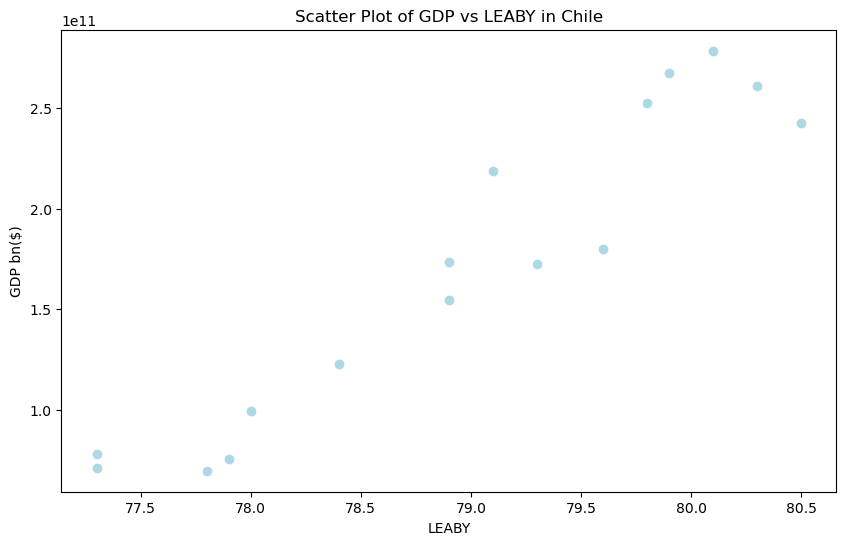

In [49]:
plt.figure(figsize=(10,6))
plt.scatter(Chile_Year_Gdp['LEABY'],Chile_Year_Gdp['GDP'], color='lightblue')
plt.title('Scatter Plot of GDP vs LEABY in Chile')
plt.ylabel('GDP bn($)')
plt.xlabel('LEABY')
plt.show()

### **distribution of life expectancy** 

#### Summary Statistics

In [53]:
Chile_Year_Gdp['LEABY'].describe()

count    16.000000
mean     78.943750
std       1.058911
min      77.300000
25%      77.975000
50%      79.000000
75%      79.825000
max      80.500000
Name: LEABY, dtype: float64

#### Box Plot

As The `mean` value ~**78.94** and the `median` value ~**79** are close to each other. It suggests that the mean is not skewed to either side by outliers, distribution is likely symmetric. 

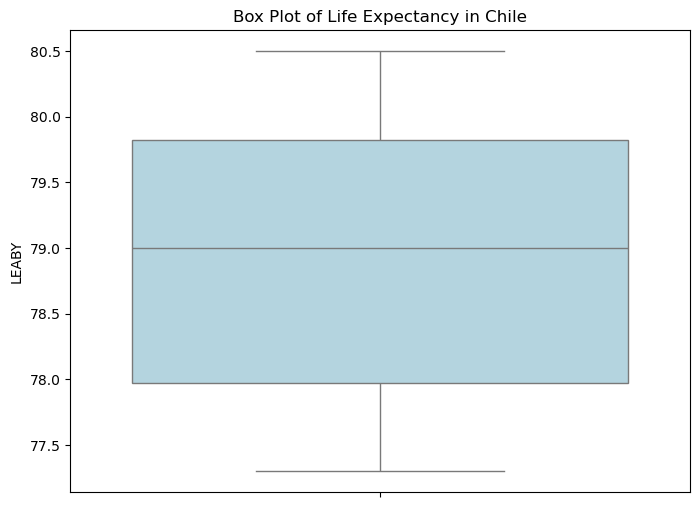

In [57]:
plt.figure(figsize=(8,6))
sns.boxplot(y=Chile_Year_Gdp['LEABY'], color='lightblue')
plt.title('Box Plot of Life Expectancy in Chile')
plt.ylabel('LEABY')
plt.show()

Calculating IQR to see if any outliers in LEABY

In [60]:
Q1 = np.percentile(Chile_Year_Gdp['LEABY'], 25)
Q3 = np.percentile(Chile_Year_Gdp['LEABY'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

No Outlier found in LEABY for Chile, as lowest LEABY being ~**77.3**, highest ~**80.5**. This improves data accuracy.

In [63]:
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}, Lower bound: {lower_bound}, Upper bound: {upper_bound}")

Q1: 77.975, Q3: 79.825, IQR: 1.8500000000000085, Lower bound: 75.19999999999999, Upper bound: 82.60000000000002


#### Violin plot 

It shows the distribution of the data, its probability density, and summary statistics. As its shape isnt 'thin' or 'bumpy', shows no outliers in the data for LEABY. Also shows short range, this suggest that although LEABY improved, it hasnt by much in Chile

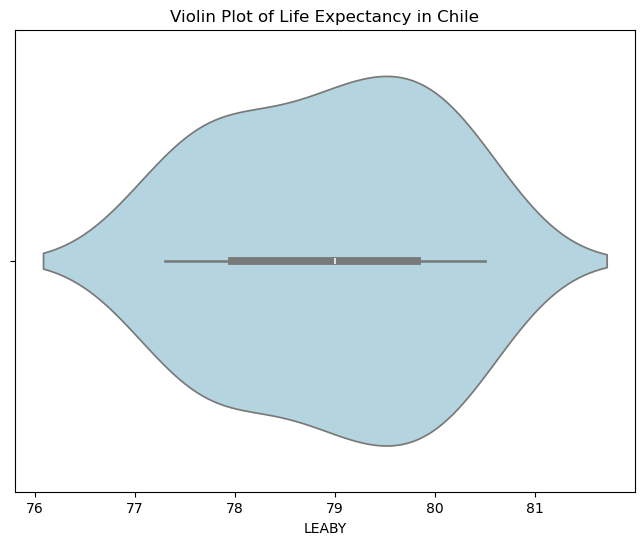

In [67]:
plt.figure(figsize=(8,6))
sns.violinplot(x=Chile_Year_Gdp['LEABY'], color='lightblue')
plt.title('Violin Plot of Life Expectancy in Chile')
plt.xlabel('LEABY')
plt.show()

#### Swarm Plots 

Another way to show distrubtion of LEABY, Theres an uptrend of LEABY throughout the years. This suggests improvement in quality of life in `Chile`

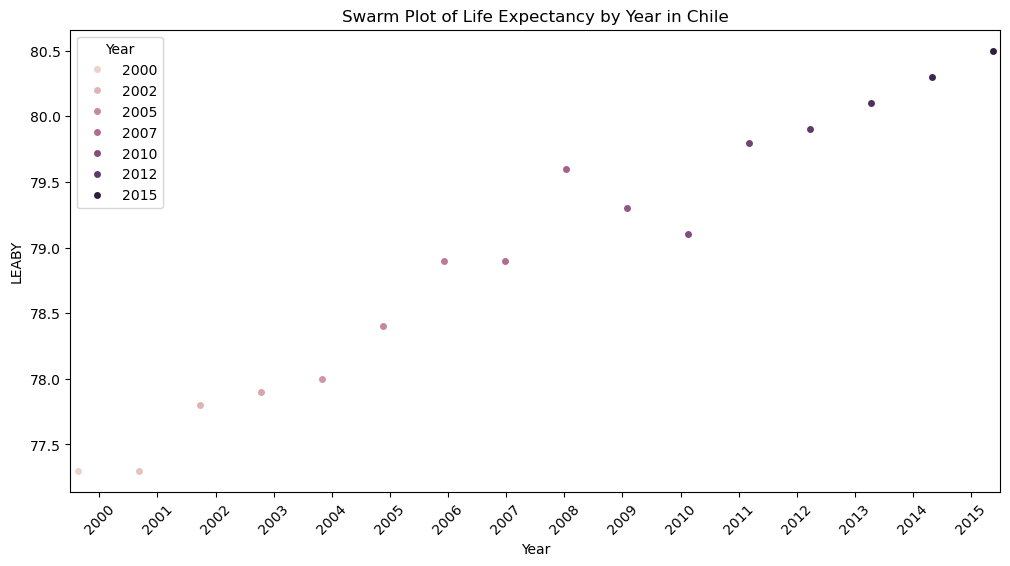

In [71]:
plt.figure(figsize=(12,6))
sns.swarmplot(x='Year', y='LEABY', hue='Year', data=Chile_Year_Gdp, dodge=True)
plt.title('Swarm Plot of Life Expectancy by Year in Chile')
plt.xlabel('Year')
plt.ylabel('LEABY')
plt.xticks(rotation=45)
plt.show()

#### Line Graph

Another way to show distribution of LEABY throughout the years. Once again an improvement in quality of life has been interpreted from the line graph

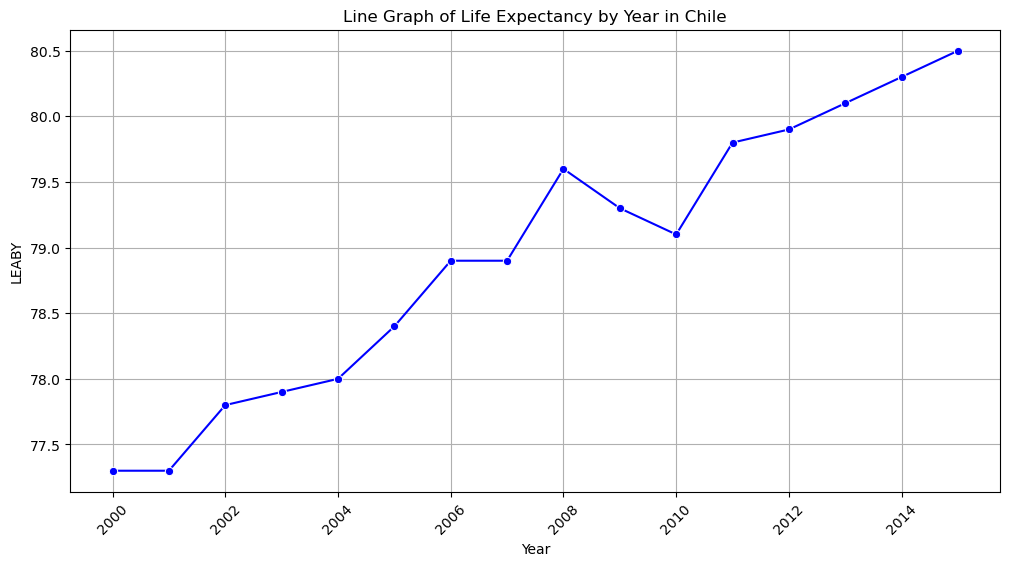

In [75]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='LEABY', data=Chile_Year_Gdp, marker='o', color='blue')
plt.title('Line Graph of Life Expectancy by Year in Chile')
plt.xlabel('Year')
plt.ylabel('LEABY')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## **China** 
---

Lets explore the country `China`.

In [97]:
China = df[df['Country'] == 'China']
print(China.head())

   Country  Year  LEABY           GDP
16   China  2000   71.7  1.211350e+12
17   China  2001   72.2  1.339400e+12
18   China  2002   72.7  1.470550e+12
19   China  2003   73.1  1.660290e+12
20   China  2004   73.5  1.955350e+12


### **GDP and LEABY relationship**

Creating a data frame to see `LEABY` and `GDP` relationship 
     
- Filter the DataFrame to get relevant columns 
- Sort the DataFrame by GDP in descending order

In [99]:
China_Year_Gdp = China[['LEABY', 'Year', 'GDP']]
China_Year_Gdp_sorted = China_Year_Gdp.sort_values(by='GDP', ascending=False)
China_Year_Gdp_sorted.reset_index(drop=True, inplace=True)

The Data suggests, high levels of `GDP` is achieved when 'LEABY' values are longer. As in **2015** LEABY value was **76.1** which is high for China. As a result GDP was as its highest. When GDP was as its lowest in **2000**, the LEABY recorded value was **71.7** the shortest in the 2000-2015 span for China.

In [101]:
China_Year_Gdp_sorted

,LEABY,Year,GDP
0,76.1,2015,1.106470e+13
1,75.8,2014,1.048240e+13
2,75.6,2013,9.607220e+12
3,75.4,2012,8.560550e+12
4,75.2,2011,7.572550e+12
5,75.0,2010,6.100620e+12
6,74.9,2009,5.109950e+12
7,74.5,2008,4.598210e+12
8,74.4,2007,3.552180e+12
9,74.2,2006,2.752130e+12


#### Correlation coefficient 

The correlation coefficient is a statistical measure that describes the strength and direction of a linear relationship between two variables. They range from -1 to 1. As for this data the `correlation coefficient` is ~**0.91**. It shows a strong positive correlation between GDP and LEABY. This means high level of `GDP` is caused by longer `LEABY`. 

In [103]:
print(f" Correlation coefficient of China GDP and LEABY is: {China_Year_Gdp['GDP'].corr(China_Year_Gdp['LEABY'])}")

 Correlation coefficient of China GDP and LEABY is: 0.9085255408648356


#### Scatter Plot

Scatter plot of GDP vs LEABY, to graphically visualise how the increase in `LEABY` has a positive effect on the country's `GDP`. As the curve shows an appreciation in LEABY, will lead to increase in country GDP

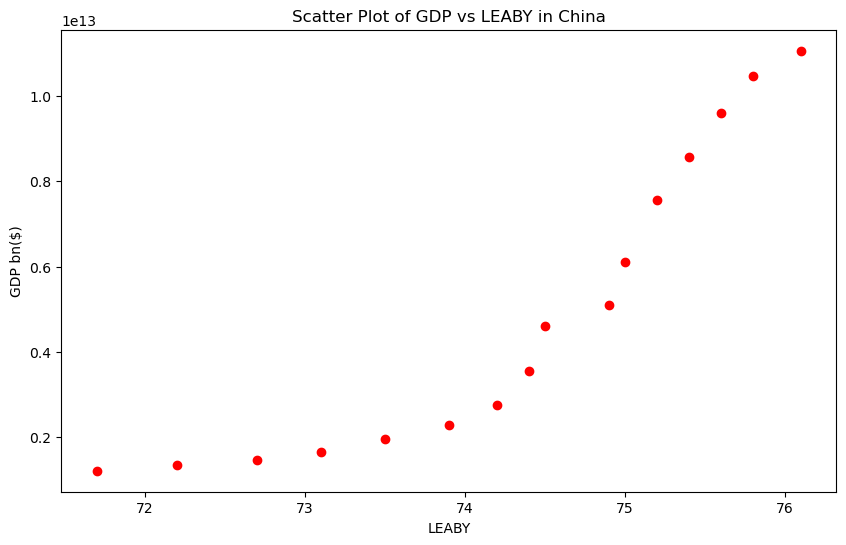

In [107]:
plt.figure(figsize=(10,6))
plt.scatter(China_Year_Gdp['LEABY'],China_Year_Gdp['GDP'], color='red')
plt.title('Scatter Plot of GDP vs LEABY in China')
plt.ylabel('GDP bn($)')
plt.xlabel('LEABY')
plt.show()

 ### **Distribution of life expectancy** 

#### Summary Statistics

In [112]:
China_Year_Gdp['LEABY'].describe()

count    16.000000
mean     74.262500
std       1.318016
min      71.700000
25%      73.400000
50%      74.450000
75%      75.250000
max      76.100000
Name: LEABY, dtype: float64

#### Box Plot 

As The `mean` value ~**74.26** and the `median` value ~**74.5** are close to each other. It suggests that the mean is not skewed to either side by outliers, distribution is likely symmetric.

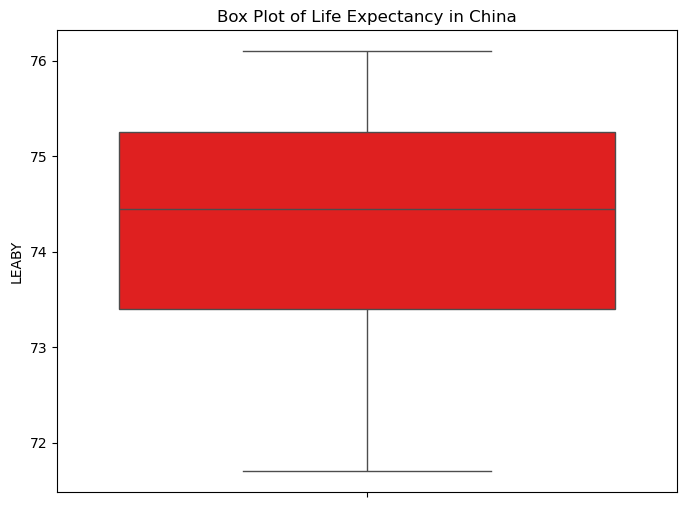

In [116]:
plt.figure(figsize=(8,6))
sns.boxplot(y=China_Year_Gdp['LEABY'], color='red')
plt.title('Box Plot of Life Expectancy in China')
plt.ylabel('LEABY')
plt.show()

Calculating IQR to see if any outliers in LEABY

In [119]:
Q1 = np.percentile(China_Year_Gdp['LEABY'], 25)
Q3 = np.percentile(China_Year_Gdp['LEABY'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

No Outlier found in LEABY for China, as lowest LEABY being ~**71.7**, highest ~**76.1**. This improves data accuracy. 

In [122]:
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}, Lower bound: {lower_bound}, Upper bound: {upper_bound}")

Q1: 73.4, Q3: 75.25, IQR: 1.8499999999999943, Lower bound: 70.62500000000001, Upper bound: 78.02499999999999


#### Violin Plot

It shows the distribution of the data, its probability density, and summary statistics. As its shape isnt 'thin' or 'bumpy', shows no outliers in the data for LEABY. However the ending of the violin thins out as the range is big. This shows that LEABY improved massively in China.

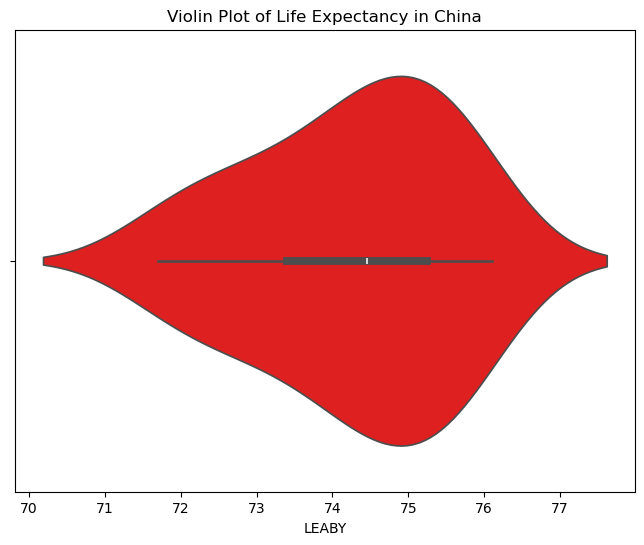

In [126]:
plt.figure(figsize=(8,6))
sns.violinplot(x=China_Year_Gdp['LEABY'], color='red')
plt.title('Violin Plot of Life Expectancy in China')
plt.xlabel('LEABY')
plt.show()

#### Swarm Plot

Another way to show distrubtion of LEABY, Theres an uptrend of LEABY throughout the years. This suggests improvement in quality of life in `China`

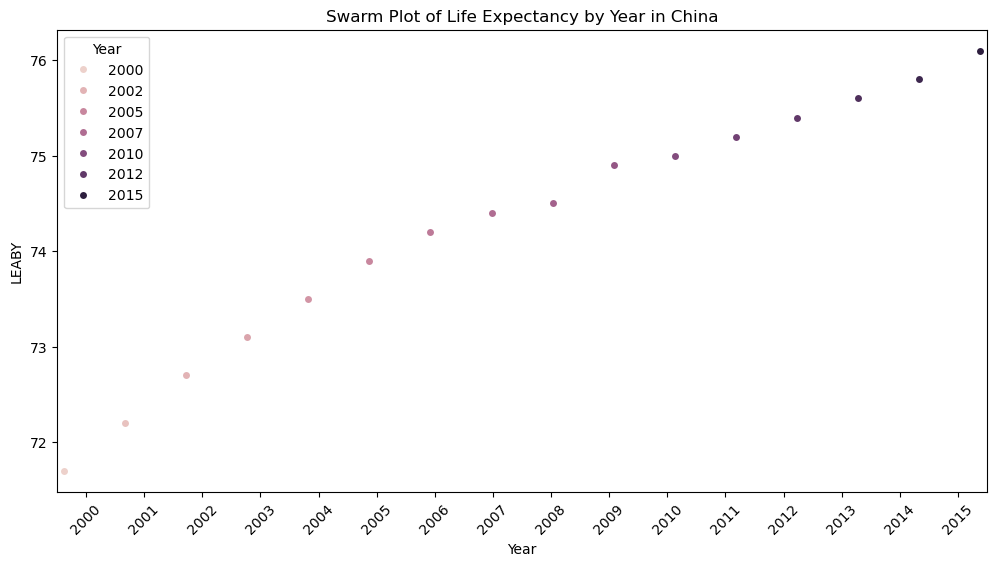

In [131]:
plt.figure(figsize=(12,6))
sns.swarmplot(x='Year', y='LEABY', hue='Year', data=China_Year_Gdp, dodge=True)
plt.title('Swarm Plot of Life Expectancy by Year in China')
plt.xlabel('Year')
plt.ylabel('LEABY')
plt.xticks(rotation=45)
plt.show()

Another way to show distrubtion of LEABY, Theres an uptrend of LEABY throughout the years. This suggests improvement in quality of life in `China`.

#### Line Graph 

Another way to show distribution of LEABY throughout the years. Once again an improvement in quality of life has been interpreted from the line graph

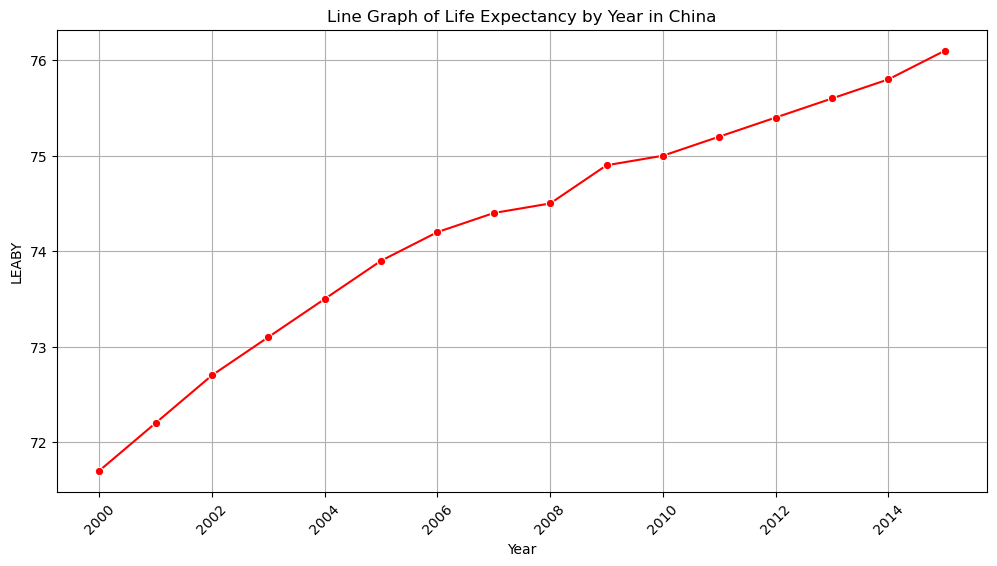

In [136]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='LEABY', data=China_Year_Gdp, marker='o', color='red')
plt.title('Line Graph of Life Expectancy by Year in China')
plt.xlabel('Year')
plt.ylabel('LEABY')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Germany 
---

Lets view `Germany`

In [140]:
Germany = df[df['Country'] == 'Germany']
print(Germany.head())

    Country  Year  LEABY           GDP
32  Germany  2000   78.0  1.949950e+12
33  Germany  2001   78.3  1.950650e+12
34  Germany  2002   78.4  2.079140e+12
35  Germany  2003   78.5  2.505730e+12
36  Germany  2004   79.1  2.819250e+12


### **GDP and LEABY relationship**

Creating a data frame to see `LEABY` and `GDP` relationship 
     
- Filter the DataFrame to get relevant columns 
- Sort the DataFrame by GDP in descending order 

In [145]:
Germany_Year_Gdp = Germany[['LEABY', 'Year', 'GDP']]
Germany_Year_Gdp_sorted = Germany_Year_Gdp.sort_values(by='GDP', ascending=False)
Germany_Year_Gdp_sorted.reset_index(drop=True, inplace=True)

The Data suggests, high levels of `GDP` is achieved when 'LEABY' values are longer. As in **2014** LEABY value was **80.9** which is high for Germany. As a result GDP was as its highest. When GDP was as its lowest in **2000**, the LEABY recorded value was **78.0** the shortest in the 2000-2015 span for Germany.

In [148]:
Germany_Year_Gdp_sorted

,LEABY,Year,GDP
0,80.9,2014,3.890610e+12
1,80.5,2011,3.757700e+12
2,80.6,2013,3.752510e+12
3,79.9,2008,3.752370e+12
4,80.6,2012,3.543980e+12
5,79.8,2007,3.439950e+12
6,80.0,2009,3.418010e+12
7,80.1,2010,3.417090e+12
8,81.0,2015,3.375610e+12
9,79.6,2006,3.002450e+12


#### Correlation coefficient

The correlation coefficient is a statistical measure that describes the strength and direction of a linear relationship between two variables. They range from -1 to 1. As for this data the `correlation coefficient` is ~**0.93**. It shows a strong positive correlation between GDP and LEABY. This means high level of `GDP` is caused by longer `LEABY` in Germany. 

In [152]:
print(f" Correlation coefficient of Germany GDP and LEABY is: {Germany_Year_Gdp['GDP'].corr(Germany_Year_Gdp['LEABY'])}")

 Correlation coefficient of Germany GDP and LEABY is: 0.9326988982561274


#### Scatter Plot

Scatter plot of GDP vs LEABY, to graphically visualise how the increase in `LEABY` has a positive effect on the country's `GDP`. As the curve shows an appreciation in LEABY, will lead to increase in country GDP. 

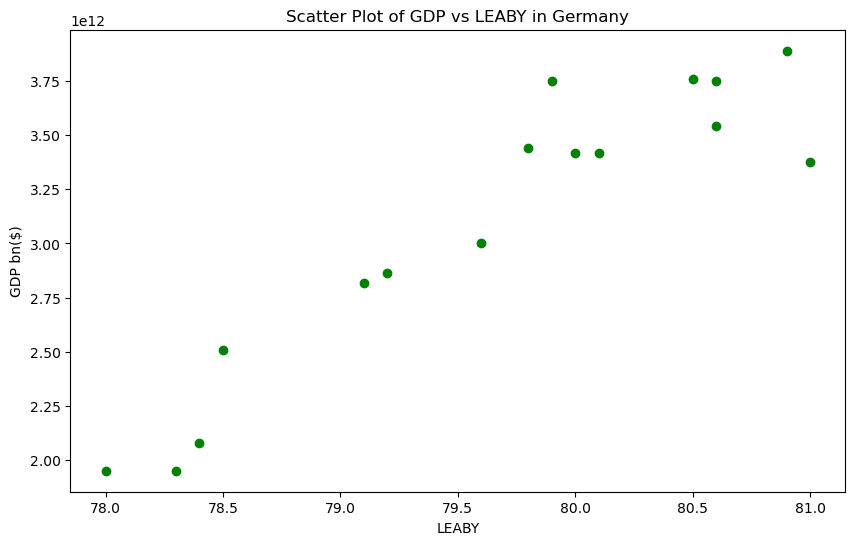

In [156]:
plt.figure(figsize=(10,6))
plt.scatter(Germany_Year_Gdp['LEABY'],Germany_Year_Gdp['GDP'], color='green')
plt.title('Scatter Plot of GDP vs LEABY in Germany')
plt.ylabel('GDP bn($)')
plt.xlabel('LEABY')
plt.show()

### **Distribution of life expectancy** 

#### Summary Statistics

In [161]:
Germany_Year_Gdp['LEABY'].describe()

count    16.00000
mean     79.65625
std       0.97500
min      78.00000
25%      78.95000
50%      79.85000
75%      80.52500
max      81.00000
Name: LEABY, dtype: float64

#### Box Plot

As The `mean` value ~**79.66** and the `median` value ~**79.9** are close to each other. It suggests that the mean is not skewed to either side by outliers, distribution is likely symmetric.

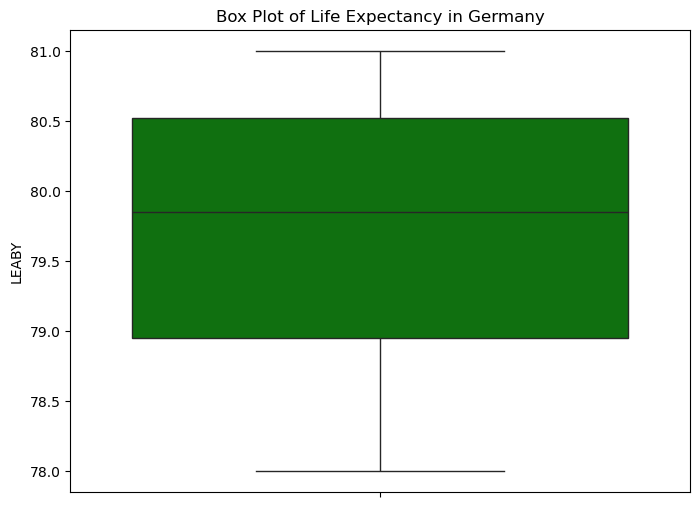

In [165]:
plt.figure(figsize=(8,6))
sns.boxplot(y=Germany_Year_Gdp['LEABY'], color='green')
plt.title('Box Plot of Life Expectancy in Germany')
plt.ylabel('LEABY')
plt.show()

Calculating IQR to see if any outliers in LEABY

In [168]:
Q1 = np.percentile(Germany_Year_Gdp['LEABY'], 25)
Q3 = np.percentile(Germany_Year_Gdp['LEABY'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

No Outlier found in LEABY for Germany, as lowest LEABY being ~**78**, highest ~**81**. This improves data accuracy.

In [171]:
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}, Lower bound: {lower_bound}, Upper bound: {upper_bound}")

Q1: 78.94999999999999, Q3: 80.525, IQR: 1.575000000000017, Lower bound: 76.58749999999996, Upper bound: 82.88750000000003


#### Violin Plot

It shows the distribution of the data, its probability density, and summary statistics. As its shape isnt 'thin' or 'bumpy', shows no outliers in the data for LEABY. However the ending of the violin thins out as the range is big. This shows that LEABY improved massively in Germany.

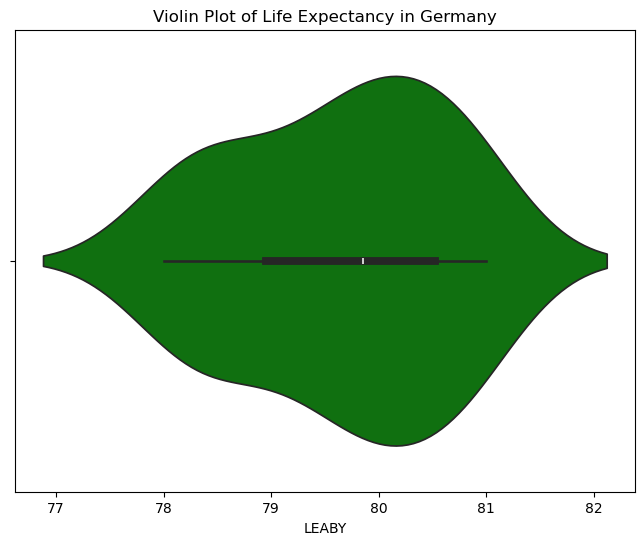

In [175]:
plt.figure(figsize=(8,6))
sns.violinplot(x=Germany_Year_Gdp['LEABY'], color='green')
plt.title('Violin Plot of Life Expectancy in Germany')
plt.xlabel('LEABY')
plt.show()

#### Swarm Plot

Another way to show distrubtion of LEABY, Theres an uptrend of LEABY throughout the years. This shows improvement in quality of life in `Germany`

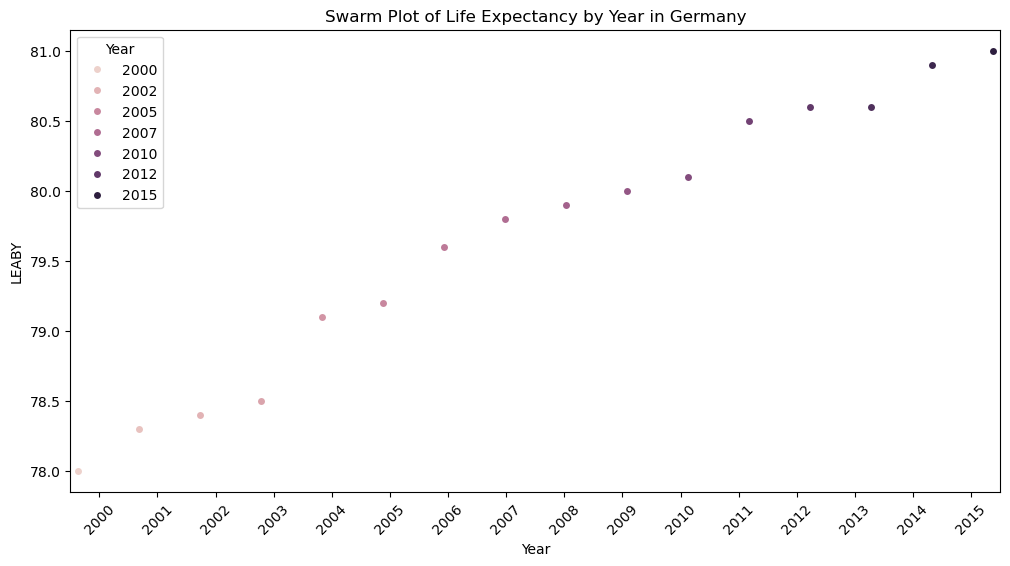

In [179]:
plt.figure(figsize=(12,6))
sns.swarmplot(x='Year', y='LEABY', hue='Year', data=Germany_Year_Gdp, dodge=True)
plt.title('Swarm Plot of Life Expectancy by Year in Germany')
plt.xlabel('Year')
plt.ylabel('LEABY')
plt.xticks(rotation=45)
plt.show()

#### Line Graph

Another way to show distribution of LEABY throughout the years. Once again an improvement in quality of life has been interpreted from the line graph

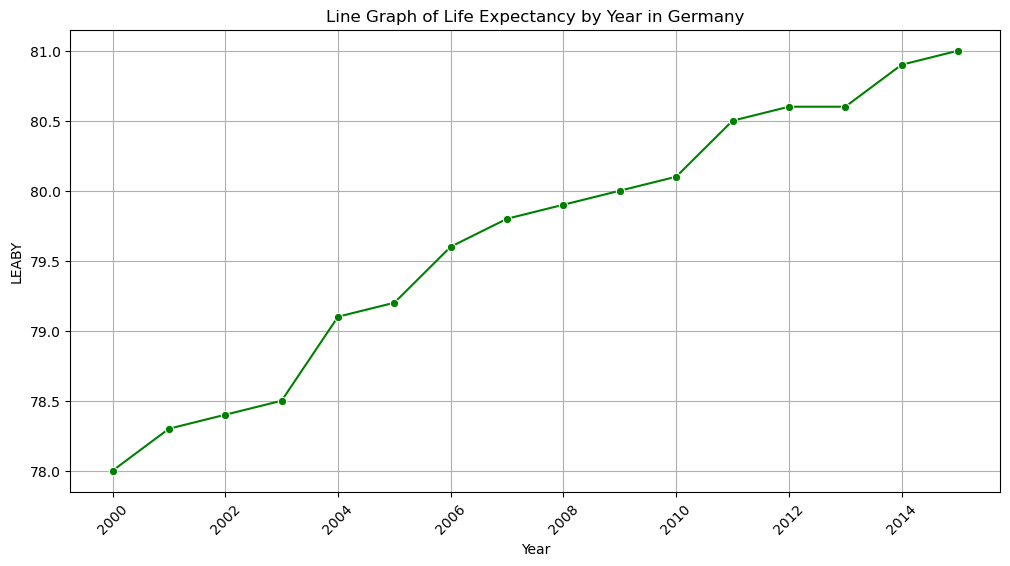

In [184]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='LEABY', data=Germany_Year_Gdp, marker='o', color='green')
plt.title('Line Graph of Life Expectancy by Year in Germany')
plt.xlabel('Year')
plt.ylabel('LEABY')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## **Mexico** 
---

A closer look to `Mexico`

In [188]:
Mexico = df[df['Country'] == 'Mexico']
print(Mexico.head())

   Country  Year  LEABY           GDP
48  Mexico  2000   74.8  6.836480e+11
49  Mexico  2001   75.0  7.247040e+11
50  Mexico  2002   75.0  7.415600e+11
51  Mexico  2003   75.0  7.132840e+11
52  Mexico  2004   75.4  7.702680e+11


### **GDP and LEABY relationship** 

Creating a data frame to see `LEABY` and `GDP` relationship 
     
- Filter the DataFrame to get relevant columns 
- Sort the DataFrame by GDP in descending order

In [192]:
Mexico_Year_Gdp = Mexico[['LEABY', 'Year', 'GDP']]
Mexico_Year_Gdp_sorted = Mexico_Year_Gdp.sort_values(by='GDP', ascending=False)
Mexico_Year_Gdp_sorted.reset_index(drop=True, inplace=True)

The Data suggests, high levels of `GDP` is achieved when 'LEABY' values are longer. As in **2014** LEABY value was **76.6** which is high for Mexico. As a result GDP was as its highest. When GDP was as its lowest in **2000**, the LEABY recorded value was **74.8** the shortest in the 2000-2015 span for Mexico. 

In [195]:
Mexico_Year_Gdp_sorted

,LEABY,Year,GDP
0,76.6,2014,1.298460e+12
1,76.6,2013,1.261980e+12
2,76.3,2012,1.186600e+12
3,76.1,2011,1.171190e+12
4,76.7,2015,1.152260e+12
5,75.6,2008,1.101280e+12
6,75.6,2010,1.051130e+12
7,76.0,2007,1.043470e+12
8,75.8,2006,9.652810e+11
9,75.7,2009,8.949490e+11


#### Correlation coefficient

The correlation coefficient is a statistical measure that describes the strength and direction of a linear relationship between two variables. They range from -1 to 1. As for this data the `correlation coefficient` is ~**0.93**. It shows a strong positive correlation between GDP and LEABY. This means high level of `GDP` is caused by longer `LEABY` in Mexico. 

In [199]:
print(f" Correlation coefficient of Mexico GDP and LEABY is: {Mexico_Year_Gdp['GDP'].corr(Mexico_Year_Gdp['LEABY'])}")

 Correlation coefficient of Mexico GDP and LEABY is: 0.9322377167847082


#### Scatter Plot

Scatter plot of GDP vs LEABY, to graphically visualise how the increase in `LEABY` has a positive effect on the country's `GDP`. As the curve shows an appreciation in LEABY, will lead to increase in country GDP.

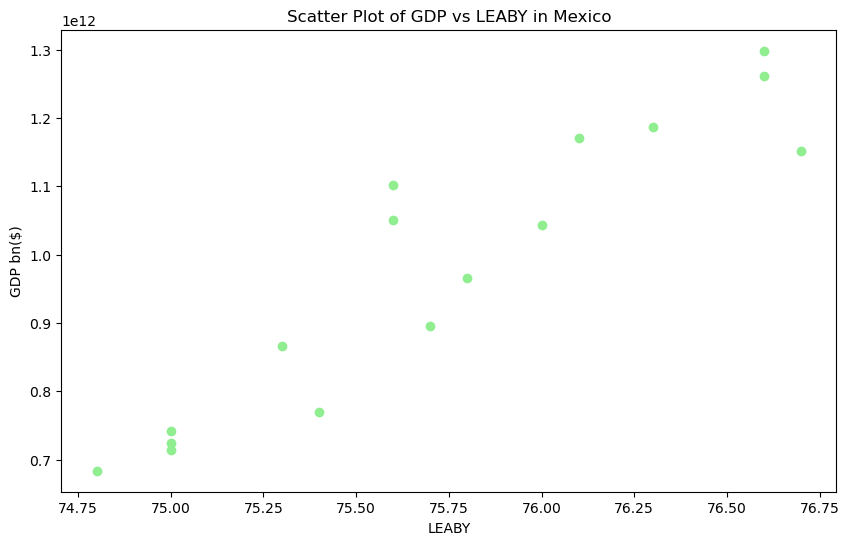

In [203]:
plt.figure(figsize=(10,6))
plt.scatter(Mexico_Year_Gdp['LEABY'],Mexico_Year_Gdp['GDP'], color='lightgreen')
plt.title('Scatter Plot of GDP vs LEABY in Mexico')
plt.ylabel('GDP bn($)')
plt.xlabel('LEABY')
plt.show()

### **Distribution of life expectancy** 

#### Summary Statistics

In [207]:
Mexico_Year_Gdp['LEABY'].describe()

count    16.000000
mean     75.718750
std       0.620987
min      74.800000
25%      75.225000
50%      75.650000
75%      76.150000
max      76.700000
Name: LEABY, dtype: float64

As The `mean` value ~**75.7** and the `median` value ~**75.6** are close to each other. It suggests that the mean is not skewed to either side by outliers, distribution is likely symmetric.

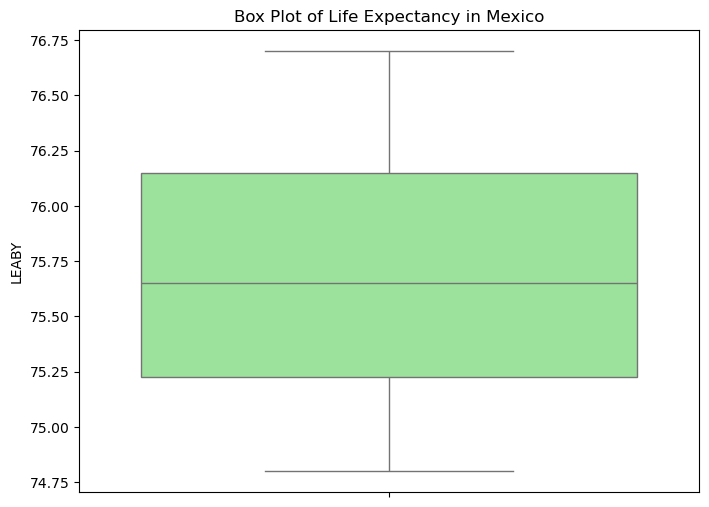

In [210]:
plt.figure(figsize=(8,6))
sns.boxplot(y=Mexico_Year_Gdp['LEABY'], color='lightgreen')
plt.title('Box Plot of Life Expectancy in Mexico')
plt.ylabel('LEABY')
plt.show()

Calculating IQR to see if any outliers in LEABY

In [213]:
Q1 = np.percentile(Mexico_Year_Gdp['LEABY'], 25)
Q3 = np.percentile(Mexico_Year_Gdp['LEABY'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

No Outlier found in LEABY for Mexico, as lowest LEABY being ~**74.8**, highest ~**76.7**. This improves data accuracy. 

In [216]:
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}, Lower bound: {lower_bound}, Upper bound: {upper_bound}")

Q1: 75.225, Q3: 76.14999999999999, IQR: 0.9249999999999972, Lower bound: 73.8375, Upper bound: 77.5375


### Violin Plot

It shows the distribution of the data, its probability density, and summary statistics. As its shape isnt 'thin', shows no outliers in the data for LEABY. However the violin shape is quite 'thick'. This is because of the range of LEABY in Mexico being small. This shows that LEABY hasnt improved by much in Mexico.

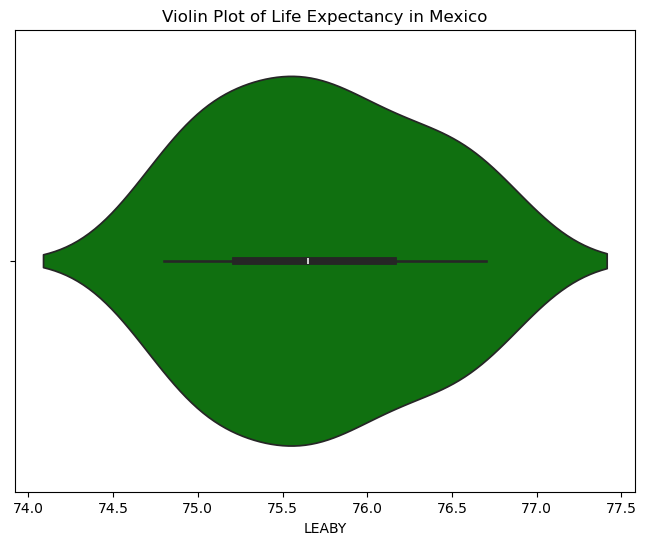

In [220]:
plt.figure(figsize=(8,6))
sns.violinplot(x=Mexico_Year_Gdp['LEABY'], color='green')
plt.title('Violin Plot of Life Expectancy in Mexico')
plt.xlabel('LEABY')
plt.show()

#### Swarm Plot

Another way to show distrubtion of LEABY, Theres an uptrend of LEABY throughout the years. This shows improvement in quality of life in `Mexico`

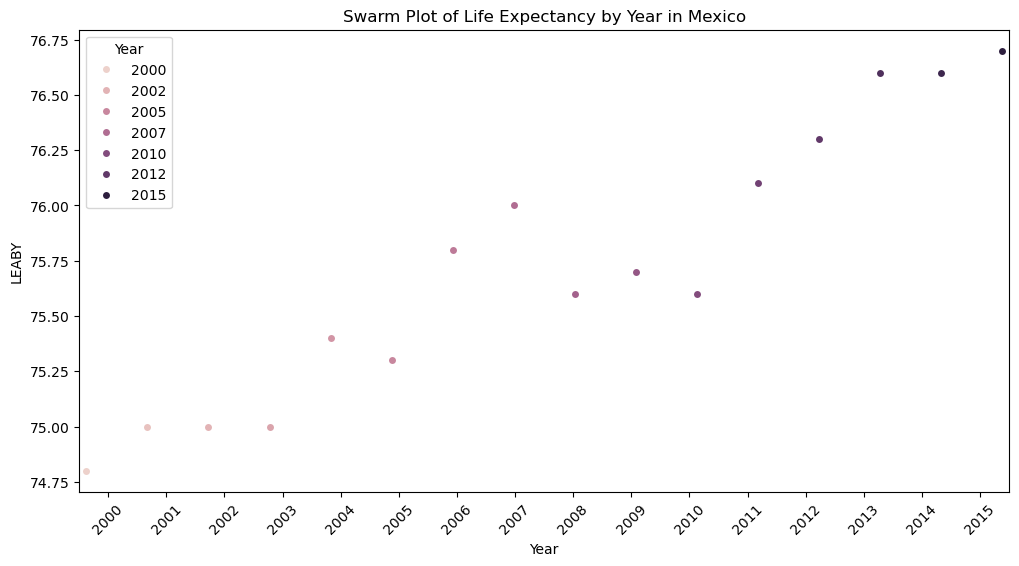

In [224]:
plt.figure(figsize=(12,6))
sns.swarmplot(x='Year', y='LEABY', hue='Year', data=Mexico_Year_Gdp, dodge=True)
plt.title('Swarm Plot of Life Expectancy by Year in Mexico')
plt.xlabel('Year')
plt.ylabel('LEABY')
plt.xticks(rotation=45)
plt.show()

#### Line Graph

Another way to show distribution of LEABY throughout the years. Once again an improvement in quality of life has been interpreted from the line graph

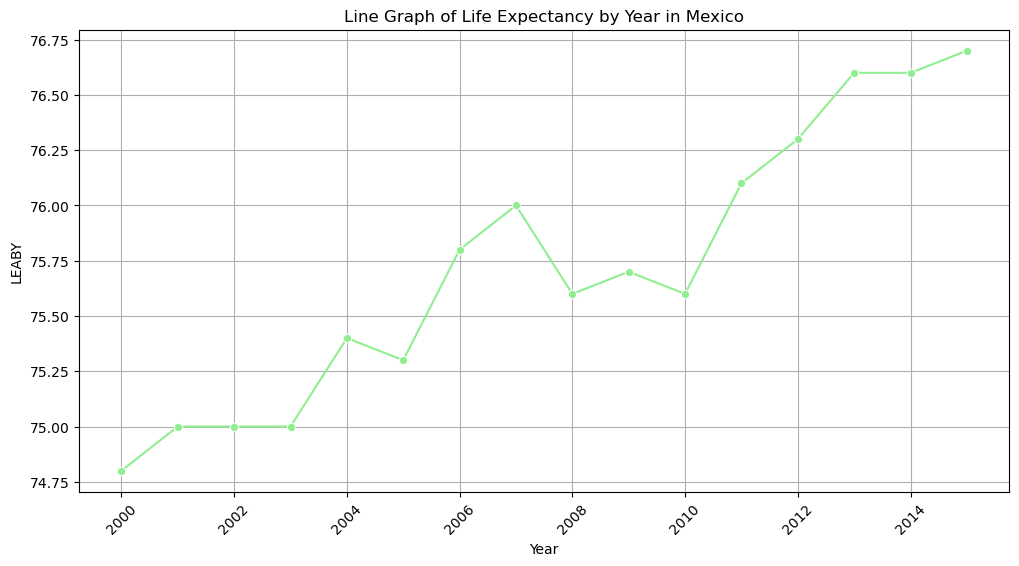

In [228]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='LEABY', data=Mexico_Year_Gdp, marker='o', color='lightgreen')
plt.title('Line Graph of Life Expectancy by Year in Mexico')
plt.xlabel('Year')
plt.ylabel('LEABY')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## **United States of America** 
--- 

Lets look at `United States of America`

In [232]:
USA = df[df['Country'] == 'United States of America']
print(USA.head())

                     Country  Year  LEABY           GDP
64  United States of America  2000   76.8  1.030000e+13
65  United States of America  2001   76.9  1.060000e+13
66  United States of America  2002   77.0  1.100000e+13
67  United States of America  2003   77.2  1.150000e+13
68  United States of America  2004   77.5  1.230000e+13


### **GDP and LEABY relationship** 

Creating a data frame to see `LEABY` and `GDP` relationship 
     
- Filter the DataFrame to get relevant columns 
- Sort the DataFrame by GDP in descending order

In [236]:
USA_Year_Gdp = USA[['LEABY', 'Year', 'GDP']]
USA_Year_Gdp_sorted = USA_Year_Gdp.sort_values(by='GDP', ascending=False)
USA_Year_Gdp_sorted.reset_index(drop=True, inplace=True)

The Data suggests, high levels of `GDP` is achieved when 'LEABY' values are longer. As in **2015** LEABY value was **79.3** which is high for USA. As a result GDP was as its highest. When GDP was as its lowest in **2000**, the LEABY recorded value was **76.8** the shortest in the 2000-2015 span for USA. 

In [239]:
USA_Year_Gdp_sorted

,LEABY,Year,GDP
0,79.3,2015,1.810000e+13
1,79.1,2014,1.740000e+13
2,78.9,2013,1.670000e+13
3,78.8,2012,1.620000e+13
4,78.7,2011,1.550000e+13
5,78.7,2010,1.500000e+13
6,78.2,2008,1.470000e+13
7,78.1,2007,1.450000e+13
8,78.5,2009,1.440000e+13
9,77.8,2006,1.390000e+13


#### Correlation coefficient

The correlation coefficient is a statistical measure that describes the strength and direction of a linear relationship between two variables. They range from -1 to 1. As for this data the `correlation coefficient` is ~**0.98**. It shows a strong positive correlation between GDP and LEABY. This means high level of `GDP` is caused by longer `LEABY` in USA. 

In [248]:
print(f" Correlation coefficient of USA GDP and LEABY is: {USA_Year_Gdp['GDP'].corr(USA_Year_Gdp['LEABY'])}")

 Correlation coefficient of Mexico GDP and LEABY is: 0.9817092382430256


#### Scatter Plot

Scatter plot of GDP vs LEABY, to graphically visualise how the increase in `LEABY` has a positive effect on the country's `GDP`. As the curve shows an appreciation in LEABY, will lead to increase in country GDP.

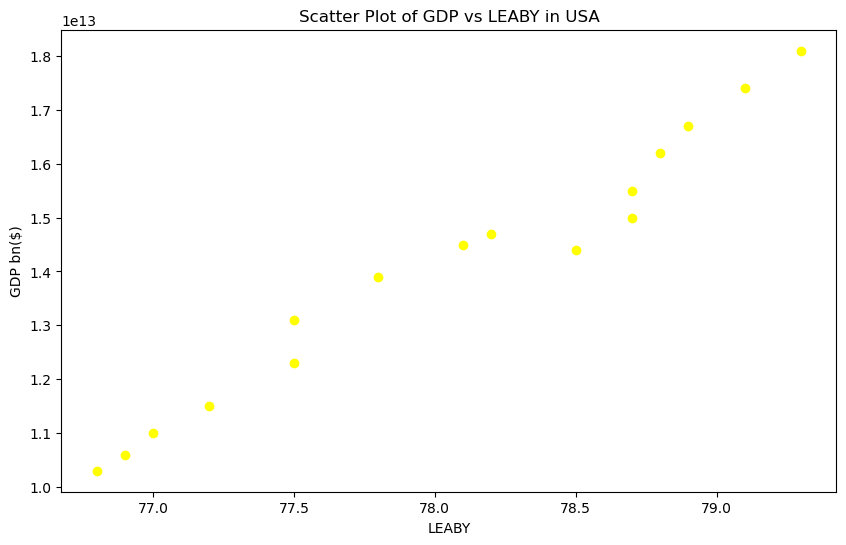

In [357]:
plt.figure(figsize=(10,6))
plt.scatter(USA_Year_Gdp['LEABY'],USA_Year_Gdp['GDP'], color='yellow')
plt.title('Scatter Plot of GDP vs LEABY in USA')
plt.ylabel('GDP bn($)')
plt.xlabel('LEABY')
plt.show()

### **Distribution of life expectancy**

#### Summary Statistics

In [363]:
USA_Year_Gdp['LEABY'].describe()

count    16.000000
mean     78.062500
std       0.832566
min      76.800000
25%      77.425000
50%      78.150000
75%      78.725000
max      79.300000
Name: LEABY, dtype: float64

As The `mean` value ~**78.1** and the `median` value ~**78.2** are close to each other. It suggests that the mean is not skewed to either side by outliers, distribution is likely symmetric.

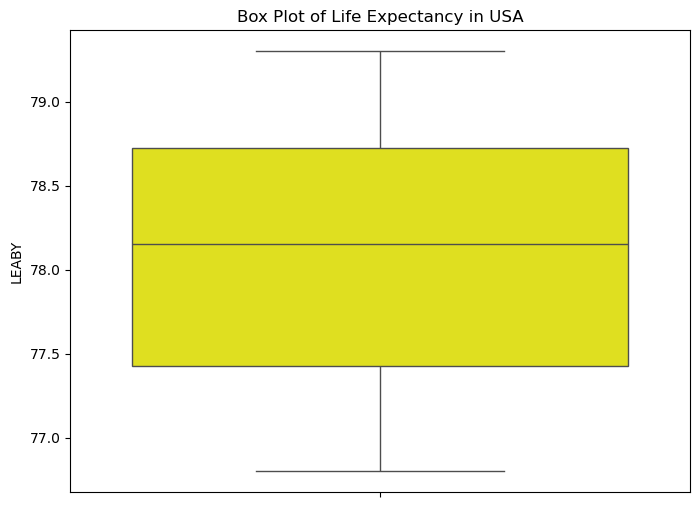

In [366]:
plt.figure(figsize=(8,6))
sns.boxplot(y=USA_Year_Gdp['LEABY'], color='yellow')
plt.title('Box Plot of Life Expectancy in USA')
plt.ylabel('LEABY')
plt.show()

Calculating IQR to see if any outliers in LEABY

In [370]:
Q1 = np.percentile(USA_Year_Gdp['LEABY'], 25)
Q3 = np.percentile(USA_Year_Gdp['LEABY'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

No Outlier found in LEABY for USA, as lowest LEABY being ~**76.8**, highest ~**79.3**. This improves data accuracy. 

In [373]:
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}, Lower bound: {lower_bound}, Upper bound: {upper_bound}")

Q1: 77.425, Q3: 78.725, IQR: 1.2999999999999972, Lower bound: 75.475, Upper bound: 80.67499999999998


### Violin Plot

It shows the distribution of the data, its probability density, and summary statistics. As its shape isnt 'thin', shows no outliers in the data for LEABY. However the violin shape is quite 'thick'. This is because of the range of LEABY in USA being small. This shows that LEABY hasnt improved by much in USA.

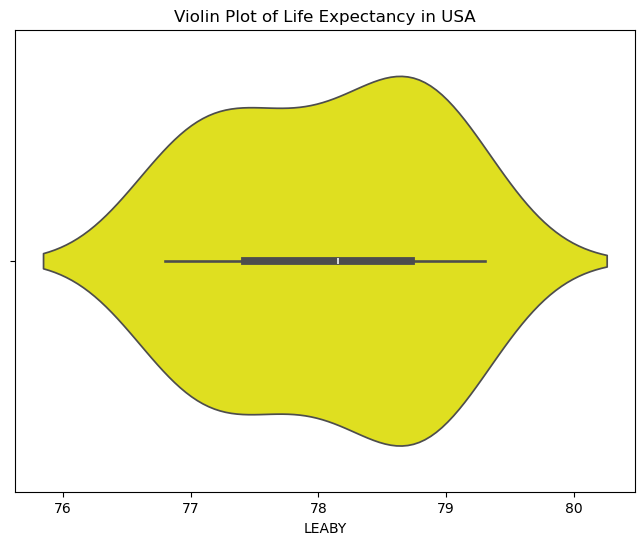

In [378]:
plt.figure(figsize=(8,6))
sns.violinplot(x=USA_Year_Gdp['LEABY'], color='yellow')
plt.title('Violin Plot of Life Expectancy in USA')
plt.xlabel('LEABY')
plt.show()

#### Swarm Plot

Another way to show distrubtion of LEABY, Theres an uptrend of LEABY throughout the years. This shows improvement in quality of life in `USA`

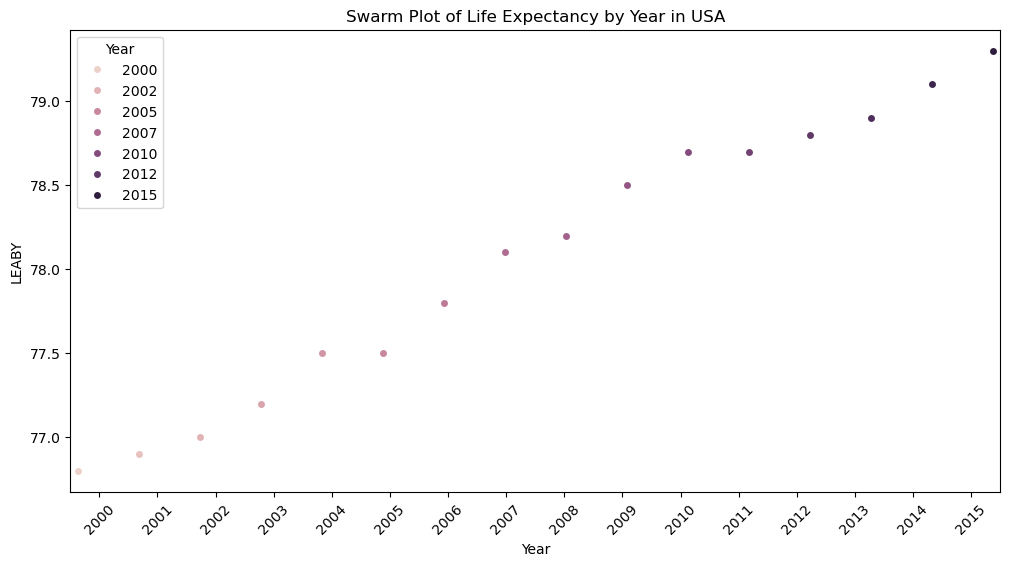

In [383]:
plt.figure(figsize=(12,6))
sns.swarmplot(x='Year', y='LEABY', hue='Year', data=USA_Year_Gdp, dodge=True)
plt.title('Swarm Plot of Life Expectancy by Year in USA')
plt.xlabel('Year')
plt.ylabel('LEABY')
plt.xticks(rotation=45)
plt.show()

#### Line Graph

Another way to show distribution of LEABY throughout the years. Once again an improvement in quality of life has been interpreted from the line graph

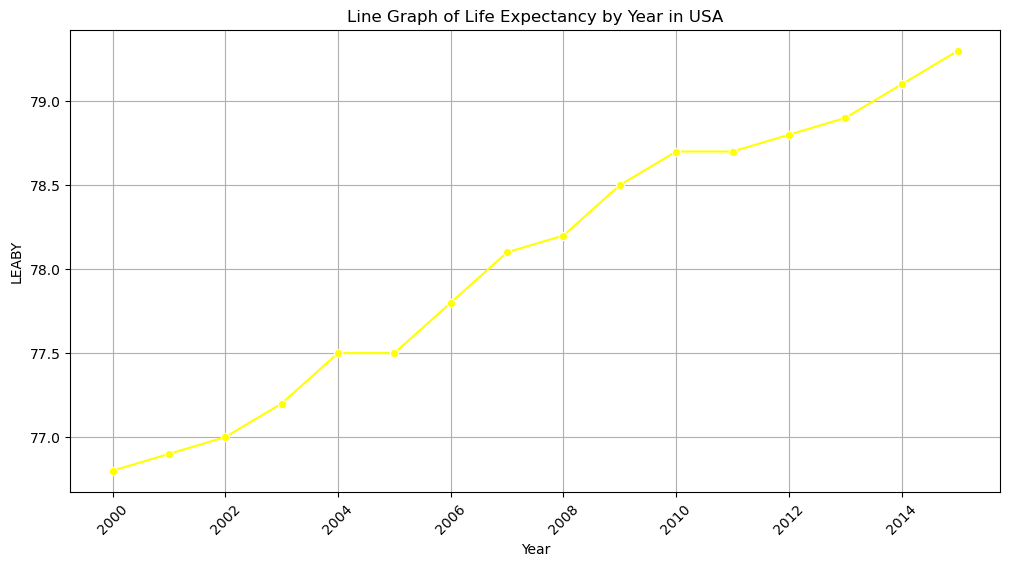

In [387]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='LEABY', data=USA_Year_Gdp, marker='o', color='yellow')
plt.title('Line Graph of Life Expectancy by Year in USA')
plt.xlabel('Year')
plt.ylabel('LEABY')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Zimbabwe
---

Finally, lets view `Zimbabwe`

In [392]:
Zimbabwe = df[df['Country'] == 'Zimbabwe']
print(Zimbabwe.head())

     Country  Year  LEABY           GDP
80  Zimbabwe  2000   46.0  6.689958e+09
81  Zimbabwe  2001   45.3  6.777385e+09
82  Zimbabwe  2002   44.8  6.342116e+09
83  Zimbabwe  2003   44.5  5.727592e+09
84  Zimbabwe  2004   44.3  5.805598e+09


### **GDP and LEABY relationship** 

Creating a data frame to see `LEABY` and `GDP` relationship 
     
- Filter the DataFrame to get relevant columns 
- Sort the DataFrame by GDP in descending order

In [396]:
Zimbabwe_Year_Gdp = Zimbabwe[['LEABY', 'Year', 'GDP']]
Zimbabwe_Year_Gdp_sorted = Zimbabwe_Year_Gdp.sort_values(by='GDP', ascending=False)
Zimbabwe_Year_Gdp_sorted.reset_index(drop=True, inplace=True)

The Data suggests, high levels of `GDP` is achieved when 'LEABY' values are longer. As in **2015** LEABY value was **60.7** which is high for Zimbabwe. As a result GDP was as its highest. When GDP was as its lowest in **2008**, the LEABY recorded value was **48.2** Although this value was not the shortest LEABY, compared to the highest value of LEABY. The difference is noticable.

In [399]:
Zimbabwe_Year_Gdp_sorted

,LEABY,Year,GDP
0,60.7,2015,1.630467e+10
1,59.2,2014,1.589105e+10
2,58.0,2013,1.545177e+10
3,56.6,2012,1.424249e+10
4,54.9,2011,1.209845e+10
5,52.4,2010,1.014186e+10
6,50.0,2009,8.621574e+09
7,45.3,2001,6.777385e+09
8,46.0,2000,6.689958e+09
9,44.8,2002,6.342116e+09


#### Correlation Coefficient

The correlation coefficient is a statistical measure that describes the strength and direction of a linear relationship between two variables. They range from -1 to 1. As for this data the correlation coefficient is ~0.97. It shows a strong positive correlation between GDP and LEABY. This means high level of GDP is caused by longer LEABY in Zimbabwe

In [406]:
print(f" Correlation coefficient of USA GDP and LEABY is: {Zimbabwe_Year_Gdp['GDP'].corr(Zimbabwe_Year_Gdp['LEABY'])}")

 Correlation coefficient of USA GDP and LEABY is: 0.9661998955858779


#### Scatter Plot

Scatter plot of GDP vs LEABY, to graphically visualise how the increase in `LEABY` has a positive effect on the country's `GDP`. As the curve shows an appreciation in LEABY, will lead to increase in country GDP.

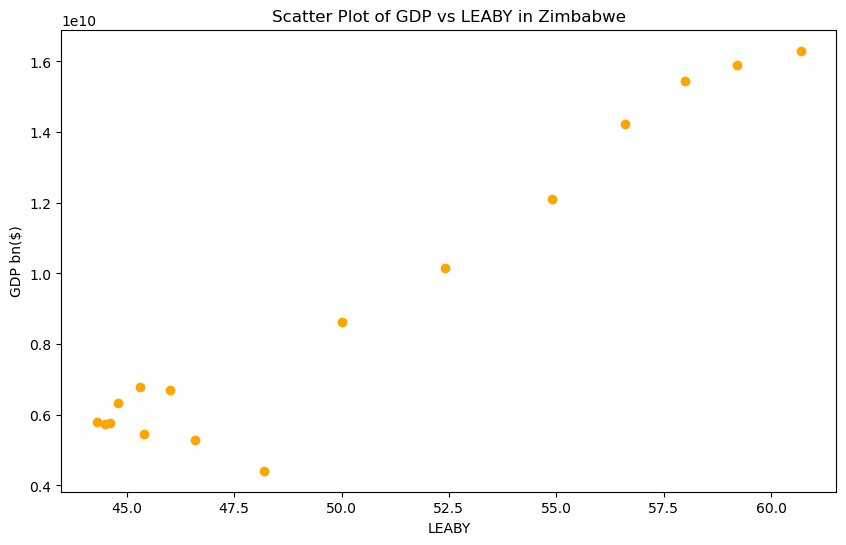

In [413]:
plt.figure(figsize=(10,6))
plt.scatter(Zimbabwe_Year_Gdp['LEABY'],Zimbabwe_Year_Gdp['GDP'], color='orange')
plt.title('Scatter Plot of GDP vs LEABY in Zimbabwe')
plt.ylabel('GDP bn($)')
plt.xlabel('LEABY')
plt.show()

### **Distribution of life expectancy**

#### Summary Statistics

In [416]:
Zimbabwe_Year_Gdp['LEABY'].describe()

count    16.000000
mean     50.093750
std       5.940311
min      44.300000
25%      45.175000
50%      47.400000
75%      55.325000
max      60.700000
Name: LEABY, dtype: float64

As The `mean` value ~**50.1** and the `median` value ~**47.5** are not that close to each other. It suggests that the mean might be  skewed to either side by outliers, distribution is likely asymmetric.

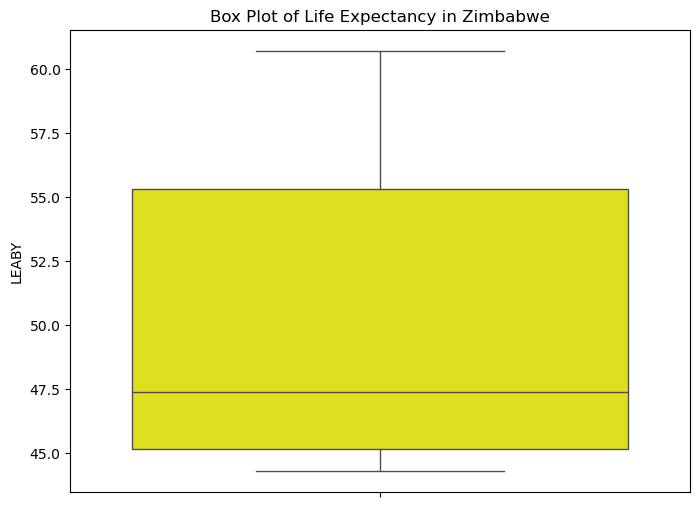

In [418]:
plt.figure(figsize=(8,6))
sns.boxplot(y=Zimbabwe_Year_Gdp['LEABY'], color='yellow')
plt.title('Box Plot of Life Expectancy in Zimbabwe')
plt.ylabel('LEABY')
plt.show()

Calculating IQR to see if any outliers in `LEABY`

In [422]:
Q1 = np.percentile(Zimbabwe_Year_Gdp['LEABY'], 25)
Q3 = np.percentile(Zimbabwe_Year_Gdp['LEABY'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

No Outlier found in LEABY for Zimbabwe, as lowest LEABY being ~**44.3**, highest ~**60.7**. 

In [425]:
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}, Lower bound: {lower_bound}, Upper bound: {upper_bound}")

Q1: 45.175, Q3: 55.325, IQR: 10.150000000000006, Lower bound: 29.94999999999999, Upper bound: 70.55000000000001


### Violin Plot

It shows the distribution of the data, its probability density, and summary statistics. As its shape isn't 'thin', shows no outliers in the data for LEABY. However the violin shape is quite 'wide'. This is because of the range of LEABY in Zimbabwe being large. This shows that LEABY hasnt improved massively in Zimbabwe.

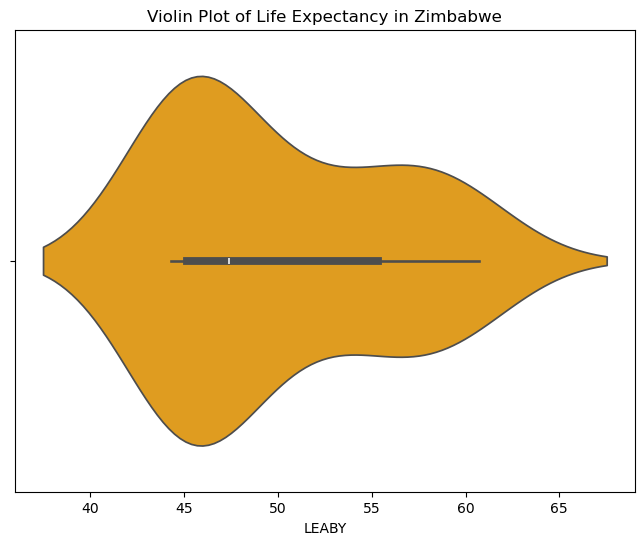

In [432]:
plt.figure(figsize=(8,6))
sns.violinplot(x=Zimbabwe_Year_Gdp['LEABY'], color='orange')
plt.title('Violin Plot of Life Expectancy in Zimbabwe')
plt.xlabel('LEABY')
plt.show()

#### Sworm Plots

Another way to show distrubtion of LEABY, Theres an uptrend of LEABY throughout the years. This shows improvement in quality of life in `USA`

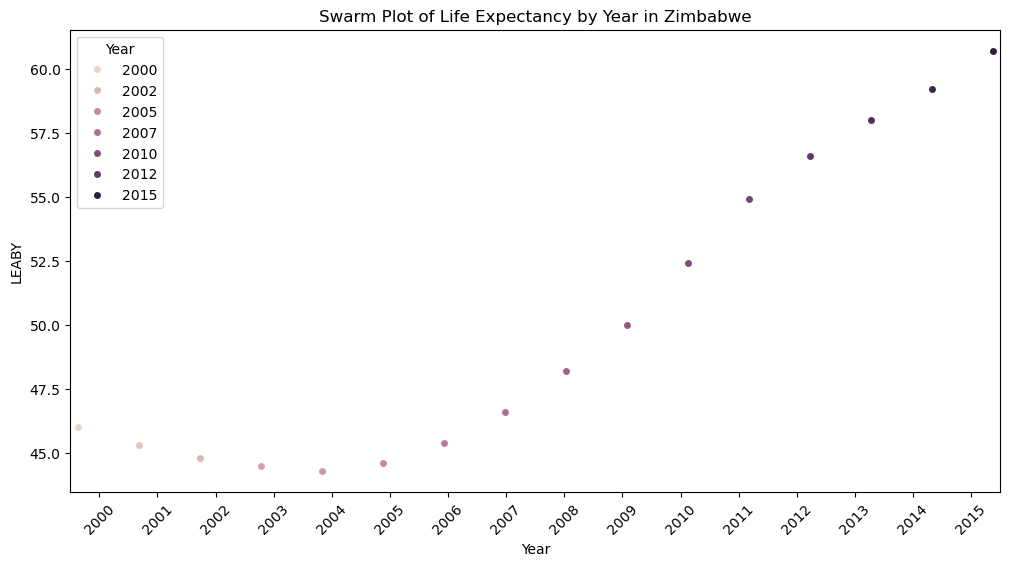

In [436]:
plt.figure(figsize=(12,6))
sns.swarmplot(x='Year', y='LEABY', hue='Year', data=Zimbabwe_Year_Gdp, dodge=True)
plt.title('Swarm Plot of Life Expectancy by Year in Zimbabwe')
plt.xlabel('Year')
plt.ylabel('LEABY')
plt.xticks(rotation=45)
plt.show()

#### Line Graph

Another way to show distribution of LEABY throughout the years. Once again an improvement in quality of life has been interpreted from the line graph

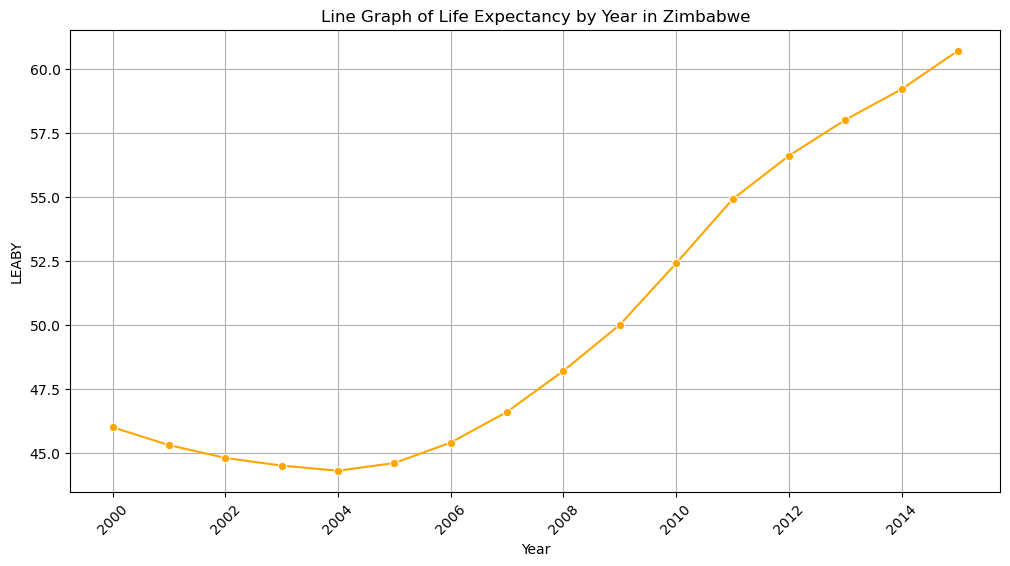

In [440]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='LEABY', data=Zimbabwe_Year_Gdp, marker='o', color='orange')
plt.title('Line Graph of Life Expectancy by Year in Zimbabwe')
plt.xlabel('Year')
plt.ylabel('LEABY')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# **Putting everything together**
---

Exploring data through plots can sometimes be much more effective, below the distribution of `GDP` is being shown. The distribution of `GDP` in the data is very right skewed where most of the values are on the left-hand side. This type of distribution could be described as a power law distribution, which is a common enough distribution that it has its own name. More about the power law can be read [here](https://en.wikipedia.org/wiki/Power_law). 

Text(0.5, 1.0, 'GDP')

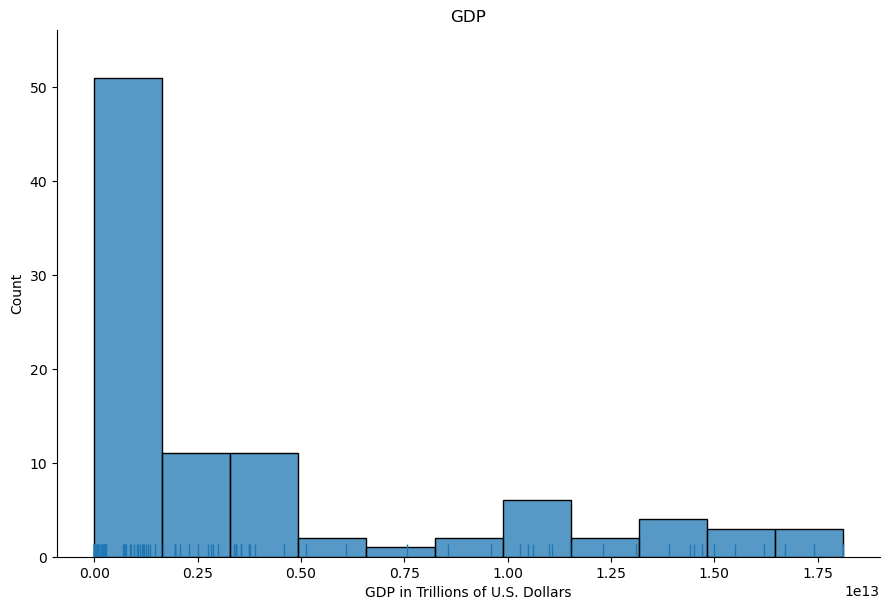

In [545]:
sns.displot(df, x='GDP', rug = True, kde=False, height=6, aspect=1.5)
plt.xlabel("GDP in Trillions of U.S. Dollars")
plt.title("GDP")

Next the distribution of `LEABY` was examined. The distribution of `LEABY` in the data is very left skewed where most of the values are on the right-hand side. This is almost the opposite of what was observed in the `GDP` column. A further look might also identify different modes or smaller groupings of distributions within the range.

Text(0.5, 1.0, 'Distribution of Life Expectancy')

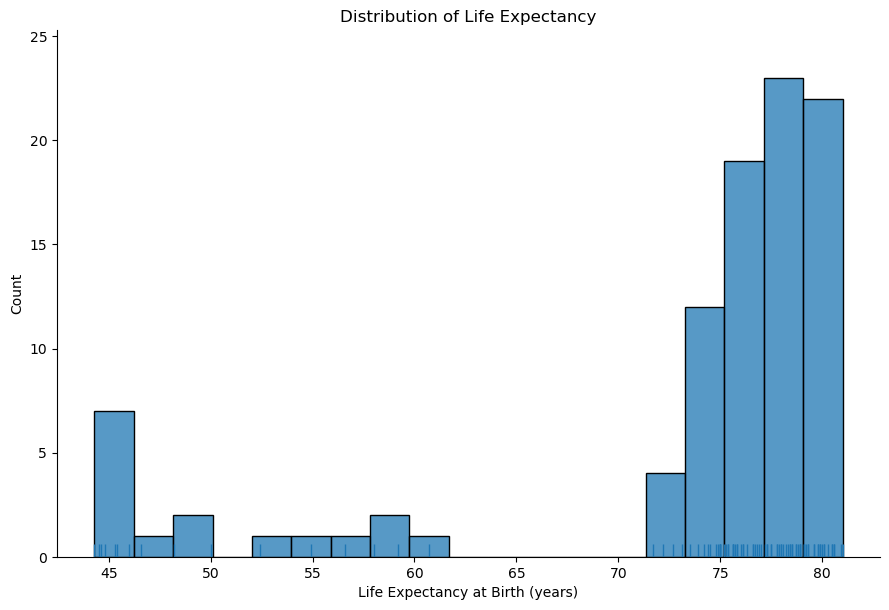

In [535]:
sns.displot(df, x="LEABY", rug=True, kde=False, height=6, aspect=1.5)
plt.xlabel("Life Expectancy at Birth (years)")
plt.title("Distribution of Life Expectancy")

In [462]:
dfMeans = df.drop("Year", axis = 1).groupby("Country").mean().reset_index()

This table shows:
- Zimbabwe has a significantly shorter LEABY, which leads to their GDP being lower compared to other countries. This could suggest lower standard of living in the country compared to others.
- USA is the most developed country as they have the highest GDP and second highest LEABY value compared to other countries
- High value of LEABY doesnt necesserily mean High value of GDP, in this table China has second lowest LEABY but second highest GDP. This is because of other factors that affect GDP for example country population, higher number of workers leads to (in theory) higher GDP.

In [466]:
dfMeans

,Country,LEABY,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


`dfMeans` in graphical form

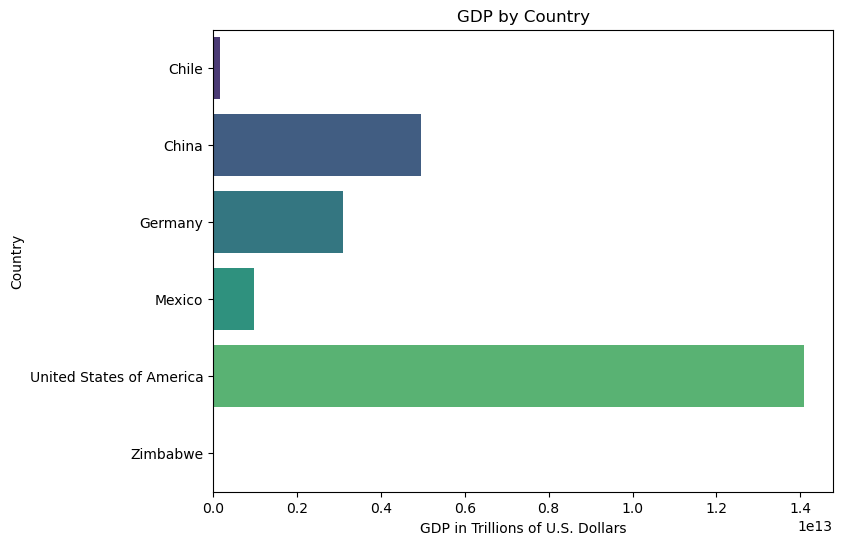

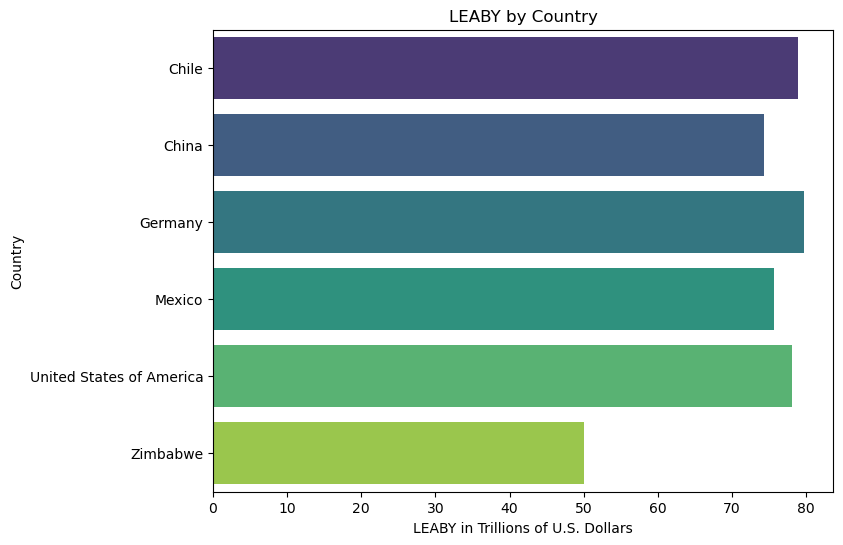

In [479]:
plt.figure(figsize=(8,6))
palette = sns.color_palette("viridis", len(dfMeans))
sns.barplot(x="GDP", y="Country", data=dfMeans, hue="Country", palette=palette, dodge=False, legend=False)
plt.xlabel("GDP in Trillions of U.S. Dollars")
plt.title("GDP by Country")
plt.show()

plt.figure(figsize=(8,6))
palette = sns.color_palette("viridis", len(dfMeans))
sns.barplot(x="LEABY", y="Country", data=dfMeans, hue="Country", palette=palette, dodge=False, legend=False)
plt.xlabel("LEABY in Trillions of U.S. Dollars")
plt.title("LEABY by Country")
plt.show()

#### Violin Plots

In the `GDP` plot on the left, China and the US have a relatively wide range, where Zimbabwe, Chile, and Mexico have shorter ranges. 
In the `LEABY` plot, many of the countries have shorter ranges except for Zimbabwe which has a range spanning from the high 30s to the high 60s

Text(0.5, 0, 'Life expectancy at birth (years)')

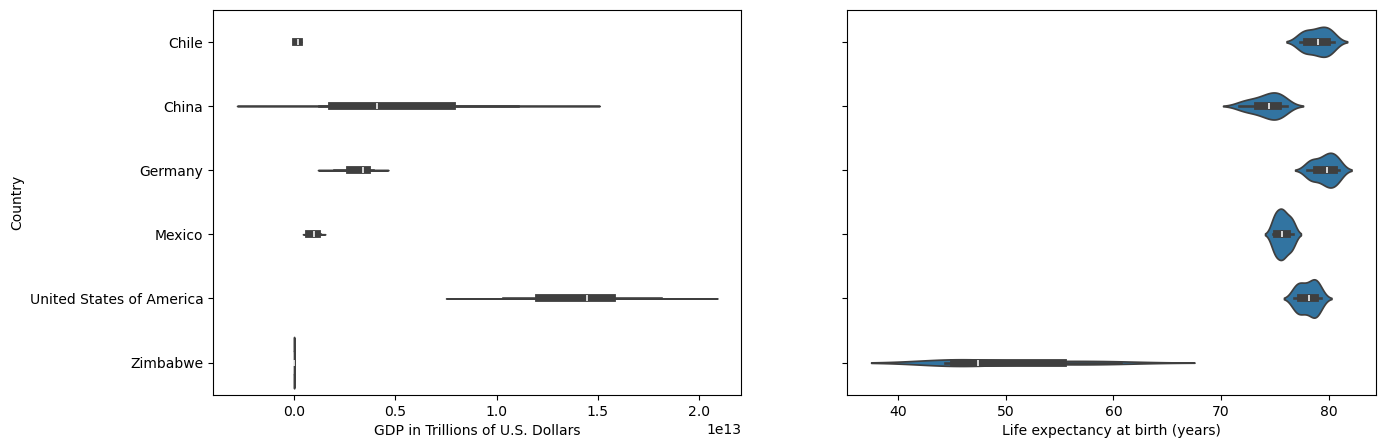

In [488]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0] = sns.violinplot(ax=axes[0], x=df.GDP, y=df.Country)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.violinplot(ax=axes[1], x=df.LEABY, y=df.Country)
axes[1].set_xlabel("Life expectancy at birth (years)")

#### Swarm Plots


In the case of of the `GDP` plot on the left, Chile and Zimbabwe have a vertical line of dots that illustrate the number of data points that fall around their values. This detail would have been lost in the box plot, unless the reader is very adept at data visualizations.

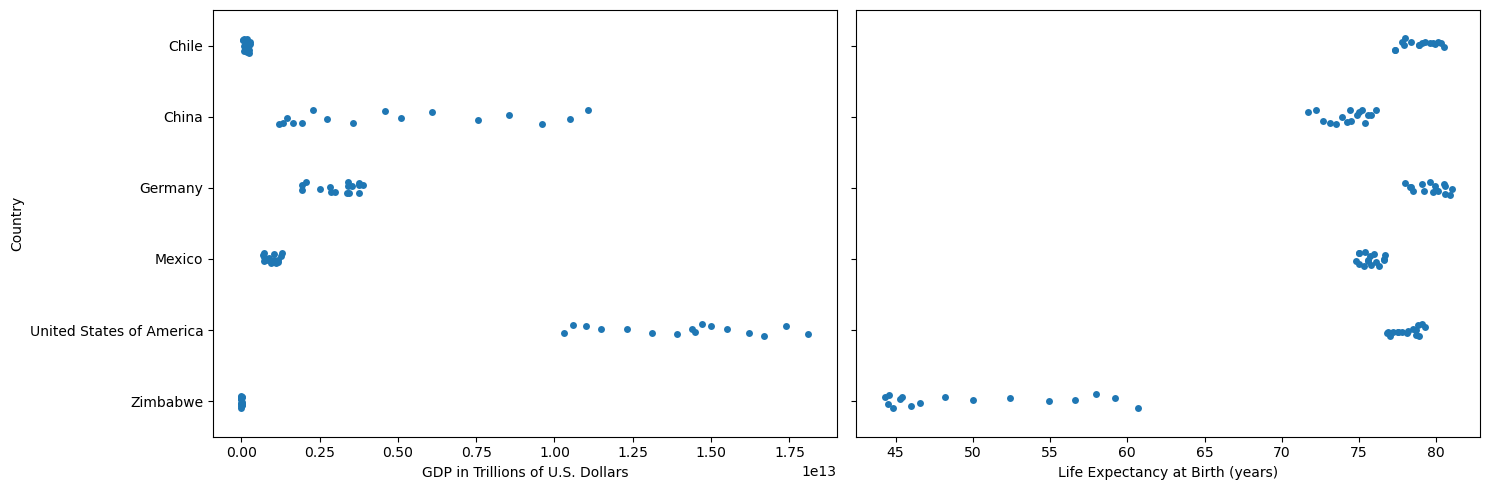

In [498]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
sns.stripplot(ax=axes[0], x=df.GDP, y=df.Country, jitter=True)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
sns.stripplot(ax=axes[1], x=df.LEABY, y=df.Country, jitter=True)
axes[1].set_xlabel("Life Expectancy at Birth (years)")
plt.tight_layout()
plt.show()

#### Line Charts

Next the data will explore `GDP` and `LEABY` over the years through line charts. Below the countries are separated by colors and one can see that the US and China have seen substantial gains between 2000-2015. China went from less than a quarter trillion dollars to one trillion dollars in the time span. The rest of the countries did not see increases in this magnitude.
Here shows once again that 'LEABY' increasing increses GDP but not significantly as both Chile and Zimbabwe are flat lines. Also Mexico line is most of it flat.

Text(0, 0.5, 'GDP in Trillions of U.S. Dollars')

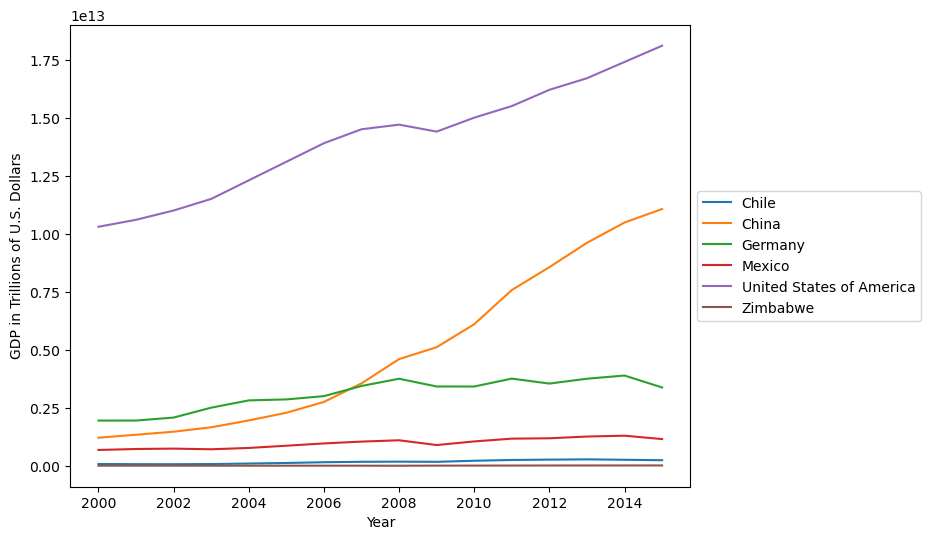

In [505]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.GDP, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("GDP in Trillions of U.S. Dollars")

Another aspect that was looked more into depth was the faceted line charts by Country. In the individual plots, each country has their own y axis, which makes it easier to compare the shape of their `GDP` over the years without the same scale. This method makes it easier to see that all of the countries have seen increases. In the chart above, the other country's GDP growth looked modest compared to China and the US, but all of the countries did experience growth from the year 2000.

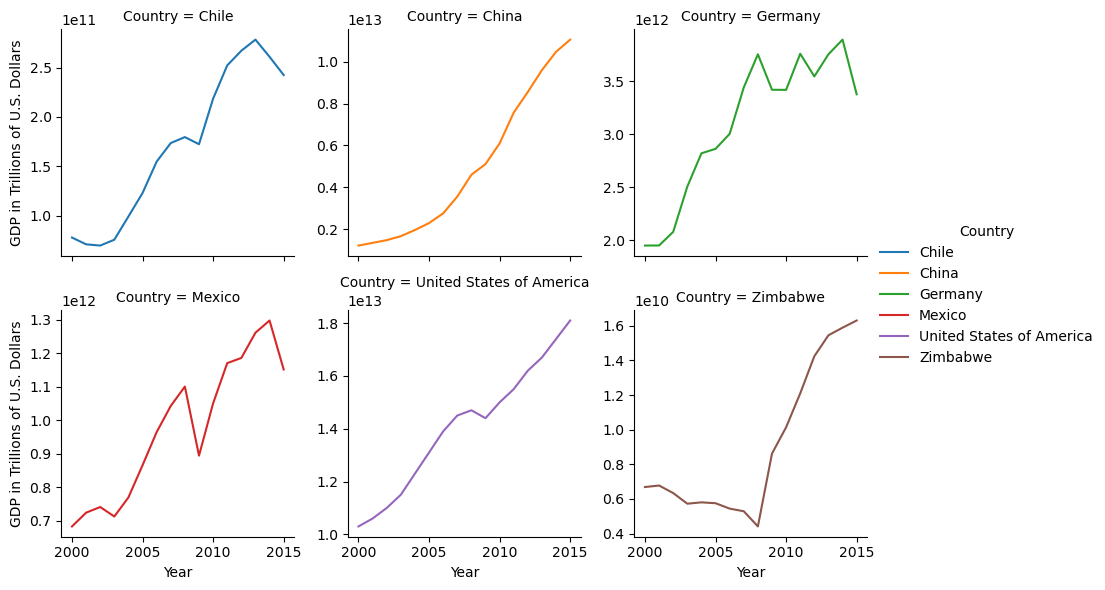

In [509]:
graphGDP = sns.FacetGrid(df, col="Country", col_wrap=3, hue = "Country", sharey = False)
graphGDP = (graphGDP.map(sns.lineplot,"Year","GDP").add_legend().set_axis_labels("Year","GDP in Trillions of U.S. Dollars"))
graphGDP

The chart below shows now looks at life expectancy over the years. The chart shows that every country has been increasing their life expectancy, but Zimbabwe has seen the greatest increase after a bit of a dip around 2004.

Text(0, 0.5, 'Life expectancy at birth (years)')

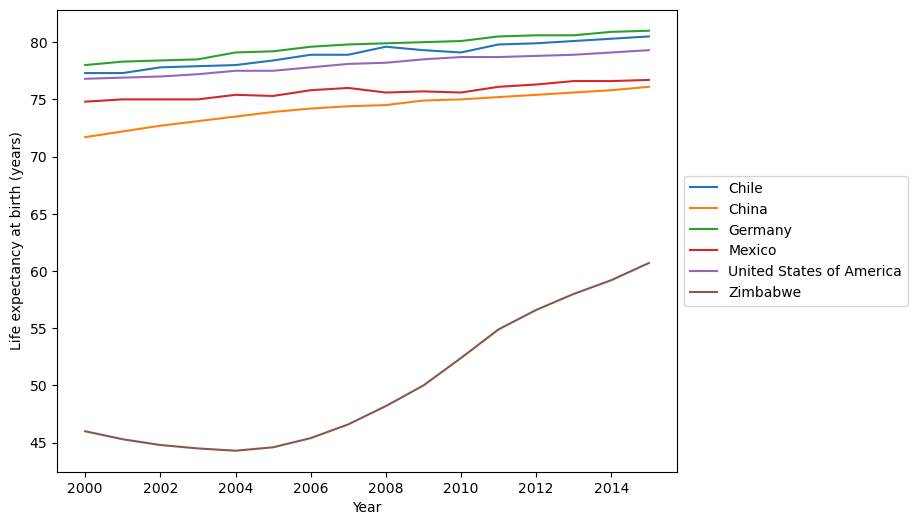

In [512]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.LEABY, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("Life expectancy at birth (years)")

Much like the break down of GDP by country before, the plot below breaks out life expectancy by country. It is apparent that Chile, and Mexico seemed to have dips in their life expectancy around the same time which could be looked into further. This type of plotting proves useful since much of these nuances were lost when the y axis was shared among the countries. Also the seemingly linear changes were in reality was not as smooth for some of the countries.

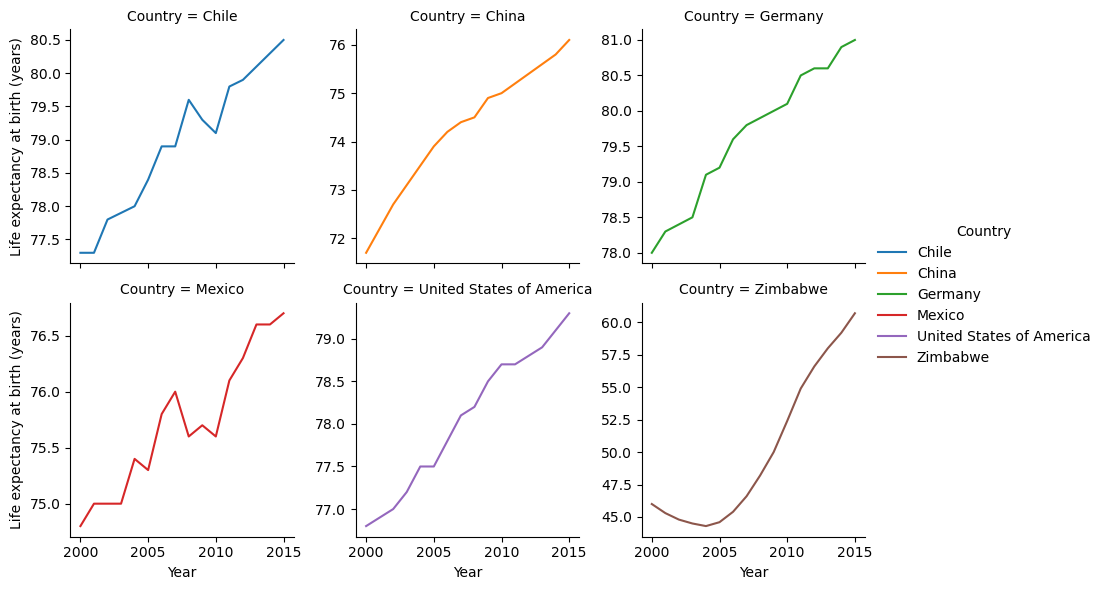

In [515]:
graphLEABY = sns.FacetGrid(df, col="Country", col_wrap=3, hue = "Country", sharey = False)
graphLEABY = (graphLEABY.map(sns.lineplot,"Year","LEABY").add_legend().set_axis_labels("Year","Life expectancy at birth (years)"))
graphLEABY

#### Scatter Plot

The next two charts will explore the relationship between `GDP` and `LEABY`. In the chart below, it looks like the previous charts where GDP for Zimbabwe is staying flat, while their life expectancy is going up. For the other countries they seem to exhibit a rise in life expectancy as GDP goes up. The US and China seem to have very similar slopes in their relationship between GDP and life expectancy.

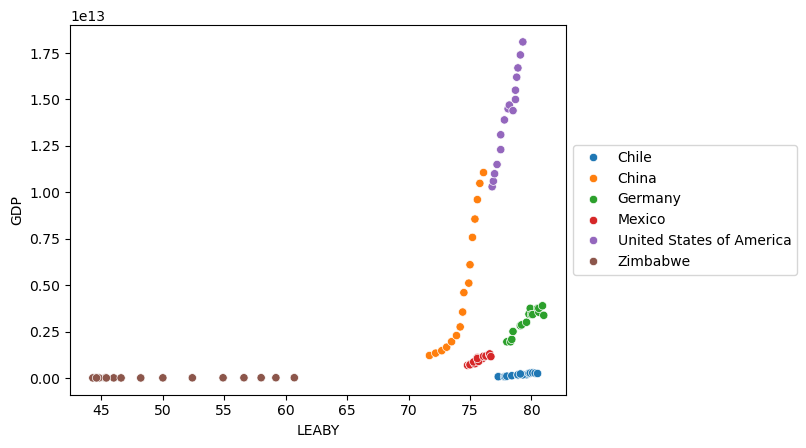

In [518]:
sns.scatterplot(x=df.LEABY, y=df.GDP, hue=df.Country).legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

Like the previous plots, countries are broken out into each scatter plot by facets. Looking at the individual countries, most countries like the US, Mexico and Zimbabwe have linear relationships between GDP and life expectancy. China on the other hand has a slightly exponential curve, and Chile's looks a bit logarithmic. In general though one can see an increase in GDP and life expectancy, exhibiting a positive correlation.

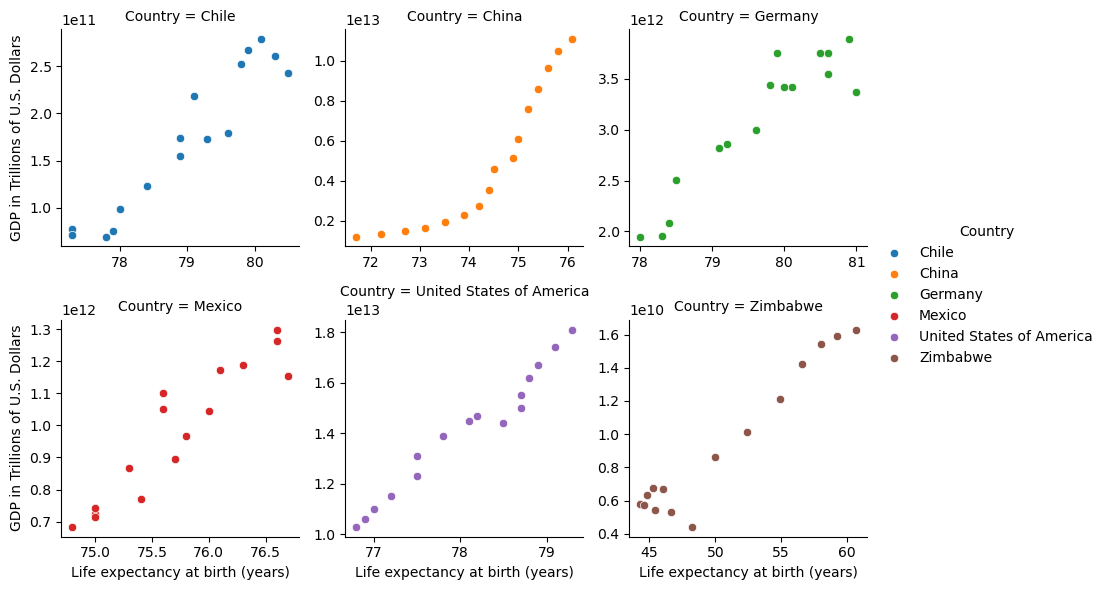

In [521]:
graph = sns.FacetGrid(df, col="Country", col_wrap=3, hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"LEABY", "GDP").add_legend().set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"))

# **Conclusion**

This project was able to make quite a few data visualizations with the data even though there were only 96 rows and 4 columns. 

The project was also able to answer some of the questions posed in the beginning:

- Has life expectancy increased over time in the six nations?
    - Yes with Zimbabwe having the greatest increase.
- Has GDP increased over time in the six nations?
    - GDP has also increased for all countries in our list, especially for China.
- Is there a correlation between GDP and life expectancy of a country?
    - Yes there is a positive correlation between GDP and life expectancy for countries in our list.
- What is the average life expectancy in these nations?
    - Average life expectancy was between mid to high 70s for the countries except for Zimbabwe which was 50.
- What is the distribution of that life expectancy?
    - the life expectancy had a left skew, or most of the observations were on the right side.

- What did you learn throughout the process?
   - GDP and LEABY have positive correlation but LEABY is not the only factor that can affect GDP. For example Zimbabwe experinced the biggest rise in LEABY but their GDP was unseen in some charts compared to the other countries.
- Are the results what you expected?
    - Yes, as well developed countries had an higher LEABY and GDP on average i.e USA and Germany. Compared to not as developed countries for example Mexico and Zimbabwe.
- What are the key findings and takeaways?
    - China economy is on the rise, as their LEABY, GDP are increasing. In real time we know their population increasing which means productivity will be increasing and China will experience economic growth.

## Further Research 

The study wanted to explore what happened in China in the past 10 years that caused the GDP to increase so drastically.

This [Forbes article](https://www.forbes.com/sites/peterpham/2018/03/06/is-there-a-secret-growth-hormone-added-to-chinas-economy/#40869ba53f13) describes China's unmatched GDP growth in the past decades were due to it's large population, newly available capital and manufacturing efficiency. The study can ascertain that the findings in the data matches the real world findings for GDP growth in China.